# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = '/data'
!pip install matplotlib==2.0.2
# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

     |████████████████████████████████| 53.9MB 92kB/s eta 0:00:0101    |██████▏                         | 10.3MB 2.5MB/s eta 0:00:18     |██████▉                         | 11.6MB 1.7MB/s eta 0:00:26
  ERROR: Complete output from command /anaconda3/envs/midi-lab/bin/python -u -c 'import setuptools, tokenize;__file__='"'"'/private/var/folders/j6/885lf4cs7cq91118qs39l_l80000gn/T/pip-install-3gnkgk5_/matplotlib/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /private/var/folders/j6/885lf4cs7cq91118qs39l_l80000gn/T/pip-wheel-_tgosyun --python-tag cp37:
  ERROR: ============================================================================
  Edit setup.cfg to change the build options
  
  BUILDING MATPLOTLIB
              matplotlib: yes [2.0.2]
                  python: yes [3.7.3 (default, Mar 27 2019, 16:54:48)  [Clang
                          4.0.1 

  copying lib/matplotlib/mpl-data/images/hand.png -> build/lib.macosx-10.7-x86_64-3.7/matplotlib/mpl-data/images
  copying lib/matplotlib/mpl-data/images/move_large.png -> build/lib.macosx-10.7-x86_64-3.7/matplotlib/mpl-data/images
  copying lib/matplotlib/mpl-data/images/forward_large.png -> build/lib.macosx-10.7-x86_64-3.7/matplotlib/mpl-data/images
  copying lib/matplotlib/mpl-data/images/forward.png -> build/lib.macosx-10.7-x86_64-3.7/matplotlib/mpl-data/images
  copying lib/matplotlib/mpl-data/images/back_large.png -> build/lib.macosx-10.7-x86_64-3.7/matplotlib/mpl-data/images
  copying lib/matplotlib/mpl-data/images/back.png -> build/lib.macosx-10.7-x86_64-3.7/matplotlib/mpl-data/images
  copying lib/matplotlib/mpl-data/images/qt4_editor_options.png -> build/lib.macosx-10.7-x86_64-3.7/matplotlib/mpl-data/images
  creating build/lib.macosx-10.7-x86_64-3.7/matplotlib/backends/web_backend/css
  copying lib/matplotlib/backends/web_backend/css/page.css -> build/lib.macosx-10.7-x86_64-

ERROR: Command "/anaconda3/envs/midi-lab/bin/python -u -c 'import setuptools, tokenize;__file__='"'"'/private/var/folders/j6/885lf4cs7cq91118qs39l_l80000gn/T/pip-install-3gnkgk5_/matplotlib/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /private/var/folders/j6/885lf4cs7cq91118qs39l_l80000gn/T/pip-record-v0b_5w5x/install-record.txt --single-version-externally-managed --compile" failed with error code 1 in /private/var/folders/j6/885lf4cs7cq91118qs39l_l80000gn/T/pip-install-3gnkgk5_/matplotlib/


PermissionError: [Errno 13] Permission denied: '/data'

## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

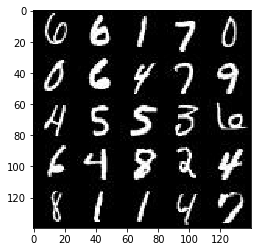

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

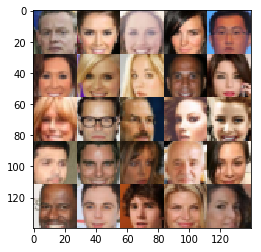

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.3.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    real_input = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels))
    z_input = tf.placeholder(tf.float32, (None, z_dim))
    learning_rate = tf.placeholder(tf.float32)
    return real_input, z_input, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Operation'>):
<tf.Operation 'assert_rank_2/Assert/Assert' type=Assert>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
['File "/opt/conda/lib/python3.6/runpy.py", line 193, in _run_module_as_main\n    "__main__", mod_spec)', 'File "/opt/conda/lib/python3.6/runpy.py", line 85, in _run_code\n    exec(code, run_globals)', 'File "/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>\n    app.launch_new_instance()', 'File "/opt/conda/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance\n    app.start()', 'File "/opt/conda/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 478, in start\n    self.io_loop.start()', 'File "/opt/conda/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start\n    super(ZMQIOLoop, self).start()', 'File "/opt/co

### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    
    with tf.variable_scope('discriminator', reuse=reuse):
        print(images.shape)
        
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same')
        x1 = tf.maximum(0.2 * x1, x1)
        print(x1.shape)
        
        x2 = tf.layers.conv2d(x1, 128, 5, strides=2, padding='same')
        x2 = tf.layers.batch_normalization(x2, training=True)
        x2 = tf.maximum(0.2 * x2, x2)
        print(x2.shape)
        
        x3 = tf.layers.conv2d(x2, 256, 5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=True)
        x3 = tf.maximum(0.2 * x3, x3)
        print(x3.shape)
        
        x3 = tf.reshape(x3, (-1, 4*4*256))
        logits = tf.layers.dense(x3, 1);
        out = tf.sigmoid(logits);
        print(x3.shape)
        
    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

(?, 28, 28, 3)
(?, 14, 14, 64)
(?, 7, 7, 128)
(?, 4, 4, 256)
(?, 4096)
(?, 28, 28, 3)
(?, 14, 14, 64)
(?, 7, 7, 128)
(?, 4, 4, 256)
(?, 4096)
Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    
    with tf.variable_scope('generator', reuse = not is_train):
        print(z.shape)
        
        x1 = tf.layers.dense(z, 4*4*256)
        print(x1.shape)
        x1 = tf.reshape(x1, (-1, 4, 4, 256))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(0.2 * x1, x1)
        print(x1.shape)
        
        x2 = tf.layers.conv2d_transpose(x1, 128, 4, strides=1, padding='valid')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(0.2 * x2, x2)
        print(x2.shape)
        
        x3 = tf.layers.conv2d_transpose(x2, 64, 5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(0.2 * x3, x3)
        print(x3.shape)
        
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 5, strides=2, padding='same')
        out = tf.tanh(logits)
        print(logits.shape)
    
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 5)
(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 5)
Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [9]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    smooth = 0.1
    
    g_out = generator(input_z, out_channel_dim, is_train=True)
    
    d_out_real, d_logits_real = discriminator(input_real, reuse=False)
    d_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like((d_out_real) * (1 - smooth))))
    
    d_out_fake, d_logits_fake = discriminator(g_out, reuse=True)
    d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like((d_out_fake) * (1 - smooth))))
    
    d_loss = d_loss_real + d_loss_fake
    
    g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_out_fake)))
        
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 4)
(?, 28, 28, 4)
(?, 14, 14, 64)
(?, 7, 7, 128)
(?, 4, 4, 256)
(?, 4096)
(?, 28, 28, 4)
(?, 14, 14, 64)
(?, 7, 7, 128)
(?, 4, 4, 256)
(?, 4096)
Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [10]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith("discriminator")]
    g_vars = [var for var in t_vars if var.name.startswith("generator")]
    
    d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
    
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [11]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})
        
    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [12]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    
    real_inputs, z_inputs, lr = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    d_loss, g_loss = model_loss(real_inputs, z_inputs, data_shape[3])
    d_train_opt, g_train_opt = model_opt(d_loss, g_loss, lr, beta1)
    
    show_every = 100
    print_every = 10
    steps = 0
    e = 0
    n_images = 25
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                batch_images *= 2
                
                _ = sess.run(d_train_opt, feed_dict={real_inputs: batch_images, z_inputs: batch_z, lr: learning_rate})
                _ = sess.run(g_train_opt, feed_dict={real_inputs: batch_images, z_inputs: batch_z, lr: learning_rate})
            
                steps += 1
                if steps % print_every == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = d_loss.eval({z_inputs: batch_z, real_inputs: batch_images})
                    train_loss_g = g_loss.eval({z_inputs: batch_z})
                    
                    print("Epoch {}/{}...".format(e+1, epochs),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))

                if steps % show_every == 0:
                    show_generator_output(sess, n_images, z_inputs, data_shape[3], data_image_mode)
            e += 1

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 1)
(?, 28, 28, 1)
(?, 14, 14, 64)
(?, 7, 7, 128)
(?, 4, 4, 256)
(?, 4096)
(?, 28, 28, 1)
(?, 14, 14, 64)
(?, 7, 7, 128)
(?, 4, 4, 256)
(?, 4096)
Epoch 1/2... Discriminator Loss: 0.3005... Generator Loss: 1.5878
Epoch 1/2... Discriminator Loss: 5.0133... Generator Loss: 0.0076
Epoch 1/2... Discriminator Loss: 0.9498... Generator Loss: 6.3370
Epoch 1/2... Discriminator Loss: 1.4884... Generator Loss: 0.4141
Epoch 1/2... Discriminator Loss: 3.3765... Generator Loss: 0.0441
Epoch 1/2... Discriminator Loss: 0.4943... Generator Loss: 1.3831
Epoch 1/2... Discriminator Loss: 0.1530... Generator Loss: 3.1812
Epoch 1/2... Discriminator Loss: 0.2160... Generator Loss: 6.1073
Epoch 1/2... Discriminator Loss: 1.1439... Generator Loss: 0.5832
Epoch 1/2... Discriminator Loss: 0.5039... Generator Loss: 1.4177
(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 1)


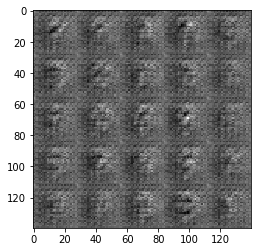

Epoch 1/2... Discriminator Loss: 0.7694... Generator Loss: 1.0204
Epoch 1/2... Discriminator Loss: 0.3701... Generator Loss: 2.7853
Epoch 1/2... Discriminator Loss: 1.7138... Generator Loss: 0.2578
Epoch 1/2... Discriminator Loss: 0.9553... Generator Loss: 0.6203
Epoch 1/2... Discriminator Loss: 0.6455... Generator Loss: 2.4981
Epoch 1/2... Discriminator Loss: 1.2859... Generator Loss: 3.4403
Epoch 1/2... Discriminator Loss: 1.3970... Generator Loss: 0.3503
Epoch 1/2... Discriminator Loss: 0.6959... Generator Loss: 2.6800
Epoch 1/2... Discriminator Loss: 1.5485... Generator Loss: 3.5414
Epoch 1/2... Discriminator Loss: 1.0664... Generator Loss: 3.2243
(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 1)


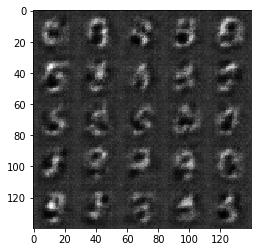

Epoch 1/2... Discriminator Loss: 1.4745... Generator Loss: 0.3779
Epoch 1/2... Discriminator Loss: 0.6547... Generator Loss: 2.3950
Epoch 1/2... Discriminator Loss: 1.1330... Generator Loss: 0.5066
Epoch 1/2... Discriminator Loss: 2.1877... Generator Loss: 0.1438
Epoch 1/2... Discriminator Loss: 0.7452... Generator Loss: 2.2682
Epoch 1/2... Discriminator Loss: 0.5340... Generator Loss: 1.8211
Epoch 1/2... Discriminator Loss: 0.4639... Generator Loss: 1.8031
Epoch 1/2... Discriminator Loss: 0.6901... Generator Loss: 1.2967
Epoch 1/2... Discriminator Loss: 0.5251... Generator Loss: 1.7617
Epoch 1/2... Discriminator Loss: 0.7969... Generator Loss: 2.8295
(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 1)


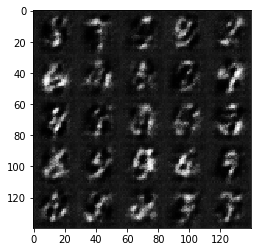

Epoch 1/2... Discriminator Loss: 1.0130... Generator Loss: 0.5782
Epoch 1/2... Discriminator Loss: 1.5120... Generator Loss: 0.3168
Epoch 1/2... Discriminator Loss: 0.5677... Generator Loss: 1.1206
Epoch 1/2... Discriminator Loss: 0.7266... Generator Loss: 0.8414
Epoch 1/2... Discriminator Loss: 1.2661... Generator Loss: 0.3936
Epoch 1/2... Discriminator Loss: 1.0485... Generator Loss: 0.5498
Epoch 1/2... Discriminator Loss: 0.5268... Generator Loss: 1.1130
Epoch 1/2... Discriminator Loss: 1.1560... Generator Loss: 3.6553
Epoch 1/2... Discriminator Loss: 1.0665... Generator Loss: 0.4576
Epoch 1/2... Discriminator Loss: 0.6280... Generator Loss: 1.0094
(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 1)


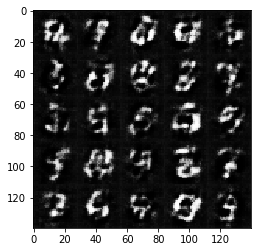

Epoch 1/2... Discriminator Loss: 0.5205... Generator Loss: 1.2209
Epoch 1/2... Discriminator Loss: 0.4252... Generator Loss: 1.5761
Epoch 1/2... Discriminator Loss: 1.2271... Generator Loss: 0.4606
Epoch 1/2... Discriminator Loss: 0.6128... Generator Loss: 0.9920
Epoch 1/2... Discriminator Loss: 1.1148... Generator Loss: 0.4685
Epoch 1/2... Discriminator Loss: 0.4836... Generator Loss: 2.3176
Epoch 1/2... Discriminator Loss: 0.4658... Generator Loss: 1.3605
Epoch 1/2... Discriminator Loss: 0.7729... Generator Loss: 0.8267
Epoch 1/2... Discriminator Loss: 1.0618... Generator Loss: 0.6189
Epoch 1/2... Discriminator Loss: 0.5590... Generator Loss: 1.1226
(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 1)


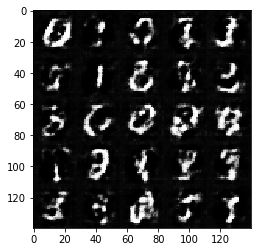

Epoch 1/2... Discriminator Loss: 0.4701... Generator Loss: 1.3004
Epoch 1/2... Discriminator Loss: 1.3490... Generator Loss: 0.3517
Epoch 1/2... Discriminator Loss: 1.0437... Generator Loss: 0.5946
Epoch 1/2... Discriminator Loss: 0.7089... Generator Loss: 1.0175
Epoch 1/2... Discriminator Loss: 1.0704... Generator Loss: 0.5323
Epoch 1/2... Discriminator Loss: 1.3614... Generator Loss: 0.4455
Epoch 1/2... Discriminator Loss: 0.5495... Generator Loss: 1.8237
Epoch 1/2... Discriminator Loss: 0.6855... Generator Loss: 0.9631
Epoch 1/2... Discriminator Loss: 0.5911... Generator Loss: 1.0648
Epoch 1/2... Discriminator Loss: 0.6939... Generator Loss: 0.9127
(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 1)


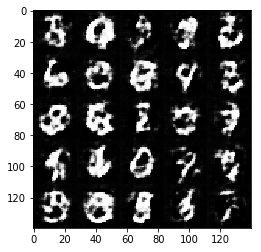

Epoch 1/2... Discriminator Loss: 1.4737... Generator Loss: 0.3046
Epoch 1/2... Discriminator Loss: 1.4248... Generator Loss: 0.4202
Epoch 1/2... Discriminator Loss: 0.6731... Generator Loss: 0.9458
Epoch 1/2... Discriminator Loss: 3.1207... Generator Loss: 5.6933
Epoch 1/2... Discriminator Loss: 0.8964... Generator Loss: 0.6725
Epoch 1/2... Discriminator Loss: 1.1299... Generator Loss: 0.5341
Epoch 1/2... Discriminator Loss: 0.5509... Generator Loss: 1.1896
Epoch 1/2... Discriminator Loss: 0.6494... Generator Loss: 0.9724
Epoch 1/2... Discriminator Loss: 2.2194... Generator Loss: 0.1659
Epoch 1/2... Discriminator Loss: 0.6267... Generator Loss: 1.6032
(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 1)


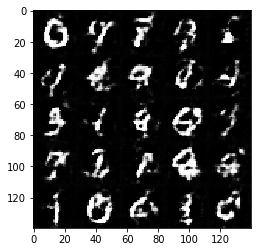

Epoch 1/2... Discriminator Loss: 0.5378... Generator Loss: 2.1651
Epoch 1/2... Discriminator Loss: 0.7092... Generator Loss: 1.0585
Epoch 1/2... Discriminator Loss: 0.9777... Generator Loss: 0.6315
Epoch 1/2... Discriminator Loss: 0.6810... Generator Loss: 2.3063
Epoch 1/2... Discriminator Loss: 0.4512... Generator Loss: 2.2277
Epoch 1/2... Discriminator Loss: 0.7379... Generator Loss: 1.0038
Epoch 1/2... Discriminator Loss: 0.7782... Generator Loss: 0.8377
Epoch 1/2... Discriminator Loss: 1.1416... Generator Loss: 0.4773
Epoch 1/2... Discriminator Loss: 1.1427... Generator Loss: 0.5155
Epoch 1/2... Discriminator Loss: 0.8414... Generator Loss: 0.8416
(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 1)


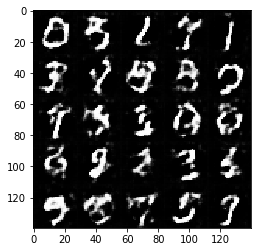

Epoch 1/2... Discriminator Loss: 1.2009... Generator Loss: 0.5539
Epoch 1/2... Discriminator Loss: 0.6240... Generator Loss: 0.9927
Epoch 1/2... Discriminator Loss: 0.5225... Generator Loss: 1.5045
Epoch 1/2... Discriminator Loss: 1.3883... Generator Loss: 0.3246
Epoch 1/2... Discriminator Loss: 0.7327... Generator Loss: 0.9029
Epoch 1/2... Discriminator Loss: 0.5707... Generator Loss: 1.7933
Epoch 1/2... Discriminator Loss: 0.6632... Generator Loss: 2.4288
Epoch 1/2... Discriminator Loss: 1.1454... Generator Loss: 3.3857
Epoch 1/2... Discriminator Loss: 2.0529... Generator Loss: 0.2345
Epoch 1/2... Discriminator Loss: 0.5316... Generator Loss: 2.0345
(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 1)


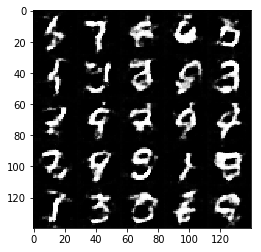

Epoch 1/2... Discriminator Loss: 0.6185... Generator Loss: 0.9661
Epoch 1/2... Discriminator Loss: 0.9229... Generator Loss: 0.7715
Epoch 1/2... Discriminator Loss: 1.1121... Generator Loss: 3.2147
Epoch 1/2... Discriminator Loss: 2.5014... Generator Loss: 0.1162
Epoch 1/2... Discriminator Loss: 0.9864... Generator Loss: 0.7044
Epoch 1/2... Discriminator Loss: 2.0947... Generator Loss: 0.1661
Epoch 1/2... Discriminator Loss: 0.8627... Generator Loss: 0.8594
Epoch 1/2... Discriminator Loss: 0.7357... Generator Loss: 1.0205
Epoch 1/2... Discriminator Loss: 1.1507... Generator Loss: 0.4854
Epoch 1/2... Discriminator Loss: 1.2902... Generator Loss: 0.4593
(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 1)


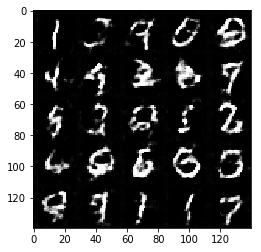

Epoch 1/2... Discriminator Loss: 0.6816... Generator Loss: 0.8921
Epoch 1/2... Discriminator Loss: 0.5584... Generator Loss: 1.0965
Epoch 1/2... Discriminator Loss: 0.4939... Generator Loss: 1.3626
Epoch 1/2... Discriminator Loss: 0.8125... Generator Loss: 0.8787
Epoch 1/2... Discriminator Loss: 0.8001... Generator Loss: 0.9871
Epoch 1/2... Discriminator Loss: 0.9619... Generator Loss: 0.6274
Epoch 1/2... Discriminator Loss: 0.9051... Generator Loss: 0.7671
Epoch 1/2... Discriminator Loss: 0.6702... Generator Loss: 1.0310
Epoch 1/2... Discriminator Loss: 1.4747... Generator Loss: 0.3311
Epoch 1/2... Discriminator Loss: 1.2844... Generator Loss: 0.4062
(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 1)


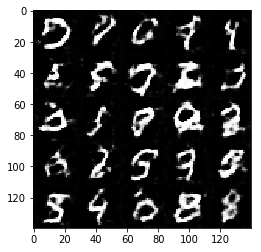

Epoch 1/2... Discriminator Loss: 0.5221... Generator Loss: 1.4064
Epoch 1/2... Discriminator Loss: 1.2317... Generator Loss: 0.5120
Epoch 1/2... Discriminator Loss: 1.1036... Generator Loss: 0.5733
Epoch 1/2... Discriminator Loss: 0.7952... Generator Loss: 0.7908
Epoch 1/2... Discriminator Loss: 1.7672... Generator Loss: 0.2172
Epoch 1/2... Discriminator Loss: 0.6187... Generator Loss: 1.3107
Epoch 1/2... Discriminator Loss: 0.5321... Generator Loss: 1.7997
Epoch 1/2... Discriminator Loss: 0.6553... Generator Loss: 1.0044
Epoch 1/2... Discriminator Loss: 0.5426... Generator Loss: 1.6014
Epoch 1/2... Discriminator Loss: 0.7319... Generator Loss: 0.8315
(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 1)


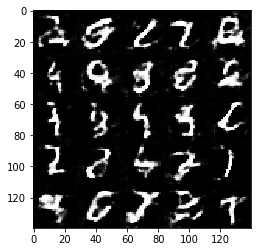

Epoch 1/2... Discriminator Loss: 0.6896... Generator Loss: 2.2881
Epoch 1/2... Discriminator Loss: 0.7406... Generator Loss: 0.7959
Epoch 1/2... Discriminator Loss: 1.2371... Generator Loss: 0.4293
Epoch 1/2... Discriminator Loss: 1.3156... Generator Loss: 0.3933
Epoch 1/2... Discriminator Loss: 0.6721... Generator Loss: 2.6214
Epoch 1/2... Discriminator Loss: 0.5980... Generator Loss: 1.2420
Epoch 1/2... Discriminator Loss: 0.8115... Generator Loss: 0.7768
Epoch 1/2... Discriminator Loss: 1.0035... Generator Loss: 0.5634
Epoch 1/2... Discriminator Loss: 1.6606... Generator Loss: 0.2966
Epoch 1/2... Discriminator Loss: 0.6436... Generator Loss: 1.0766
(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 1)


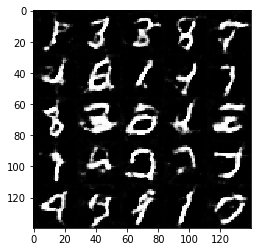

Epoch 1/2... Discriminator Loss: 1.3188... Generator Loss: 0.3806
Epoch 1/2... Discriminator Loss: 0.8418... Generator Loss: 1.0930
Epoch 1/2... Discriminator Loss: 0.8990... Generator Loss: 0.6813
Epoch 1/2... Discriminator Loss: 0.7300... Generator Loss: 0.8949
Epoch 1/2... Discriminator Loss: 0.7602... Generator Loss: 0.9228
Epoch 1/2... Discriminator Loss: 0.7554... Generator Loss: 0.9633
Epoch 1/2... Discriminator Loss: 0.6895... Generator Loss: 0.9526
Epoch 1/2... Discriminator Loss: 0.8880... Generator Loss: 0.7781
Epoch 1/2... Discriminator Loss: 0.6136... Generator Loss: 1.3247
Epoch 1/2... Discriminator Loss: 0.7810... Generator Loss: 0.8985
(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 1)


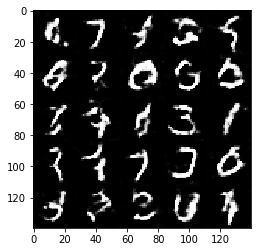

Epoch 1/2... Discriminator Loss: 1.0225... Generator Loss: 0.6152
Epoch 1/2... Discriminator Loss: 0.6719... Generator Loss: 1.5116
Epoch 1/2... Discriminator Loss: 0.6420... Generator Loss: 1.1235
Epoch 1/2... Discriminator Loss: 1.5784... Generator Loss: 0.2736
Epoch 1/2... Discriminator Loss: 0.7842... Generator Loss: 1.1014
Epoch 1/2... Discriminator Loss: 0.5872... Generator Loss: 1.0986
Epoch 1/2... Discriminator Loss: 0.8610... Generator Loss: 0.7787
Epoch 1/2... Discriminator Loss: 0.4999... Generator Loss: 1.4416
Epoch 1/2... Discriminator Loss: 0.6725... Generator Loss: 1.1141
Epoch 1/2... Discriminator Loss: 0.7300... Generator Loss: 1.9807
(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 1)


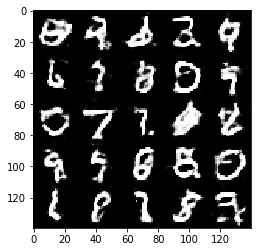

Epoch 1/2... Discriminator Loss: 0.7554... Generator Loss: 0.8191
Epoch 1/2... Discriminator Loss: 1.0507... Generator Loss: 0.5847
Epoch 1/2... Discriminator Loss: 0.5899... Generator Loss: 1.1166
Epoch 1/2... Discriminator Loss: 3.9228... Generator Loss: 6.4285
Epoch 1/2... Discriminator Loss: 0.9917... Generator Loss: 0.7064
Epoch 1/2... Discriminator Loss: 1.3423... Generator Loss: 0.3850
Epoch 1/2... Discriminator Loss: 1.9760... Generator Loss: 0.1943
Epoch 1/2... Discriminator Loss: 0.5724... Generator Loss: 1.1704
Epoch 1/2... Discriminator Loss: 1.0577... Generator Loss: 0.5610
Epoch 1/2... Discriminator Loss: 0.9721... Generator Loss: 0.5958
(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 1)


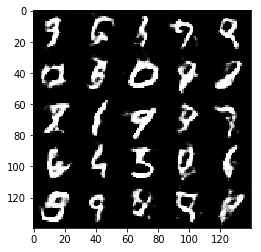

Epoch 1/2... Discriminator Loss: 1.1222... Generator Loss: 0.4506
Epoch 1/2... Discriminator Loss: 0.9226... Generator Loss: 0.6839
Epoch 1/2... Discriminator Loss: 1.9840... Generator Loss: 0.1982
Epoch 1/2... Discriminator Loss: 1.4781... Generator Loss: 0.3414
Epoch 1/2... Discriminator Loss: 0.7682... Generator Loss: 0.8216
Epoch 1/2... Discriminator Loss: 0.7394... Generator Loss: 0.8291
Epoch 1/2... Discriminator Loss: 0.3538... Generator Loss: 1.7654
Epoch 1/2... Discriminator Loss: 0.6740... Generator Loss: 1.0122
Epoch 1/2... Discriminator Loss: 0.4244... Generator Loss: 1.5793
Epoch 1/2... Discriminator Loss: 0.6778... Generator Loss: 0.9111
(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 1)


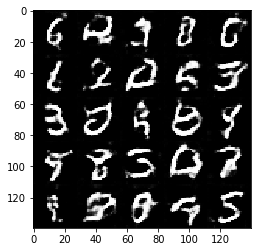

Epoch 1/2... Discriminator Loss: 0.4082... Generator Loss: 2.0563
Epoch 1/2... Discriminator Loss: 0.8153... Generator Loss: 0.7762
Epoch 1/2... Discriminator Loss: 0.4630... Generator Loss: 1.3893
Epoch 1/2... Discriminator Loss: 1.0344... Generator Loss: 0.4970
Epoch 1/2... Discriminator Loss: 0.6874... Generator Loss: 0.8706
Epoch 1/2... Discriminator Loss: 0.7439... Generator Loss: 0.8055
Epoch 1/2... Discriminator Loss: 4.0308... Generator Loss: 8.3888
Epoch 1/2... Discriminator Loss: 0.3836... Generator Loss: 1.7630
Epoch 1/2... Discriminator Loss: 0.5640... Generator Loss: 1.1547
Epoch 1/2... Discriminator Loss: 1.2299... Generator Loss: 0.4242
(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 1)


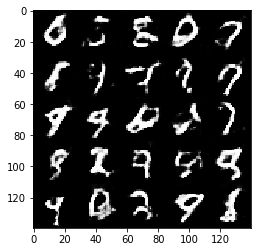

Epoch 1/2... Discriminator Loss: 0.5416... Generator Loss: 1.0870
Epoch 1/2... Discriminator Loss: 1.3954... Generator Loss: 0.3386
Epoch 1/2... Discriminator Loss: 0.7873... Generator Loss: 1.6288
Epoch 1/2... Discriminator Loss: 0.4242... Generator Loss: 2.3588
Epoch 1/2... Discriminator Loss: 1.2611... Generator Loss: 0.4362
Epoch 1/2... Discriminator Loss: 1.2546... Generator Loss: 0.4465
Epoch 1/2... Discriminator Loss: 0.9104... Generator Loss: 0.7122
Epoch 1/2... Discriminator Loss: 0.5968... Generator Loss: 1.1035
Epoch 1/2... Discriminator Loss: 0.7244... Generator Loss: 0.8235
Epoch 1/2... Discriminator Loss: 0.4986... Generator Loss: 1.1137
(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 1)


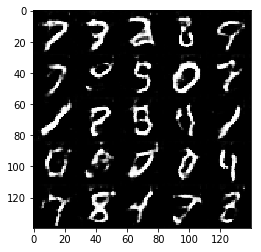

Epoch 1/2... Discriminator Loss: 0.3443... Generator Loss: 1.7984
Epoch 1/2... Discriminator Loss: 0.6952... Generator Loss: 0.7990
Epoch 1/2... Discriminator Loss: 0.3391... Generator Loss: 1.5031
Epoch 1/2... Discriminator Loss: 0.5440... Generator Loss: 1.2116
Epoch 1/2... Discriminator Loss: 0.9866... Generator Loss: 0.5720
Epoch 1/2... Discriminator Loss: 2.5971... Generator Loss: 0.1190
Epoch 1/2... Discriminator Loss: 0.9897... Generator Loss: 0.5722
Epoch 1/2... Discriminator Loss: 0.4767... Generator Loss: 1.3806
Epoch 1/2... Discriminator Loss: 0.6562... Generator Loss: 0.8995
Epoch 1/2... Discriminator Loss: 0.4820... Generator Loss: 1.3900
(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 1)


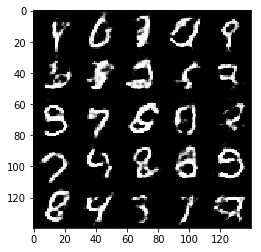

Epoch 1/2... Discriminator Loss: 0.8080... Generator Loss: 0.7354
Epoch 1/2... Discriminator Loss: 0.7838... Generator Loss: 0.7843
Epoch 1/2... Discriminator Loss: 1.7521... Generator Loss: 0.2662
Epoch 1/2... Discriminator Loss: 0.6040... Generator Loss: 1.0250
Epoch 1/2... Discriminator Loss: 0.5777... Generator Loss: 3.4511
Epoch 1/2... Discriminator Loss: 0.7903... Generator Loss: 1.8426
Epoch 1/2... Discriminator Loss: 0.8212... Generator Loss: 0.8556
Epoch 1/2... Discriminator Loss: 0.7719... Generator Loss: 0.9753
Epoch 1/2... Discriminator Loss: 0.7682... Generator Loss: 0.9128
Epoch 1/2... Discriminator Loss: 0.6951... Generator Loss: 0.9431
(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 1)


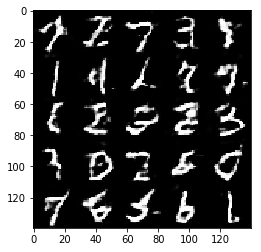

Epoch 1/2... Discriminator Loss: 2.6159... Generator Loss: 0.1544
Epoch 1/2... Discriminator Loss: 0.5999... Generator Loss: 1.0920
Epoch 1/2... Discriminator Loss: 0.7364... Generator Loss: 0.9278
Epoch 1/2... Discriminator Loss: 0.7639... Generator Loss: 0.9387
Epoch 1/2... Discriminator Loss: 0.5879... Generator Loss: 1.0290
Epoch 1/2... Discriminator Loss: 0.6351... Generator Loss: 1.0133
Epoch 1/2... Discriminator Loss: 0.7750... Generator Loss: 0.8304
Epoch 1/2... Discriminator Loss: 0.3308... Generator Loss: 1.8458
Epoch 1/2... Discriminator Loss: 0.3892... Generator Loss: 1.4528
Epoch 1/2... Discriminator Loss: 0.5547... Generator Loss: 1.1694
(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 1)


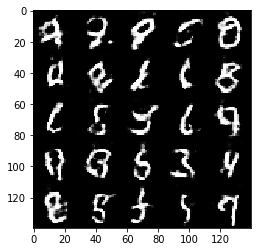

Epoch 1/2... Discriminator Loss: 0.5050... Generator Loss: 1.0862
Epoch 1/2... Discriminator Loss: 0.7233... Generator Loss: 0.8402
Epoch 1/2... Discriminator Loss: 0.4056... Generator Loss: 1.5270
Epoch 1/2... Discriminator Loss: 0.8004... Generator Loss: 0.8046
Epoch 1/2... Discriminator Loss: 0.4393... Generator Loss: 1.4186
Epoch 1/2... Discriminator Loss: 0.2778... Generator Loss: 2.2010
Epoch 1/2... Discriminator Loss: 0.4165... Generator Loss: 1.7328
Epoch 1/2... Discriminator Loss: 1.5671... Generator Loss: 0.4054
Epoch 1/2... Discriminator Loss: 0.8583... Generator Loss: 0.7114
Epoch 1/2... Discriminator Loss: 0.7345... Generator Loss: 0.8834
(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 1)


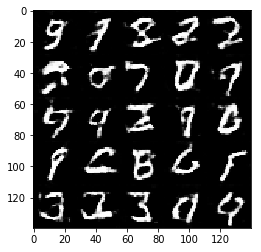

Epoch 1/2... Discriminator Loss: 0.2797... Generator Loss: 2.0065
Epoch 1/2... Discriminator Loss: 0.6651... Generator Loss: 1.3735
Epoch 1/2... Discriminator Loss: 0.6939... Generator Loss: 0.8995
Epoch 1/2... Discriminator Loss: 0.4875... Generator Loss: 1.1683
Epoch 1/2... Discriminator Loss: 0.6774... Generator Loss: 0.7984
Epoch 1/2... Discriminator Loss: 0.5027... Generator Loss: 1.1002
Epoch 1/2... Discriminator Loss: 0.7561... Generator Loss: 0.8956
Epoch 1/2... Discriminator Loss: 0.3942... Generator Loss: 1.3035
Epoch 1/2... Discriminator Loss: 0.6826... Generator Loss: 0.9779
Epoch 1/2... Discriminator Loss: 0.6520... Generator Loss: 0.9629
(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 1)


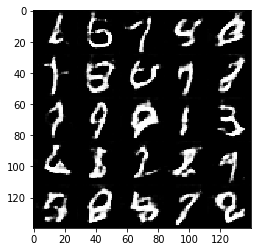

Epoch 1/2... Discriminator Loss: 1.1695... Generator Loss: 0.4685
Epoch 1/2... Discriminator Loss: 1.3789... Generator Loss: 0.4180
Epoch 1/2... Discriminator Loss: 0.5262... Generator Loss: 1.3444
Epoch 1/2... Discriminator Loss: 0.8717... Generator Loss: 0.6573
Epoch 1/2... Discriminator Loss: 0.3324... Generator Loss: 1.6429
Epoch 1/2... Discriminator Loss: 0.9326... Generator Loss: 0.7615
Epoch 1/2... Discriminator Loss: 2.5406... Generator Loss: 0.1515
Epoch 1/2... Discriminator Loss: 1.7669... Generator Loss: 0.3196
Epoch 1/2... Discriminator Loss: 1.4158... Generator Loss: 2.8868
Epoch 1/2... Discriminator Loss: 0.9073... Generator Loss: 0.6919
(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 1)


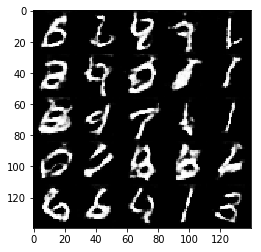

Epoch 1/2... Discriminator Loss: 1.1505... Generator Loss: 0.6113
Epoch 1/2... Discriminator Loss: 0.9006... Generator Loss: 0.6590
Epoch 1/2... Discriminator Loss: 0.6400... Generator Loss: 0.9595
Epoch 1/2... Discriminator Loss: 1.0688... Generator Loss: 0.5636
Epoch 1/2... Discriminator Loss: 0.7894... Generator Loss: 0.7980
Epoch 1/2... Discriminator Loss: 0.8158... Generator Loss: 0.7118
Epoch 1/2... Discriminator Loss: 0.8200... Generator Loss: 0.7142
Epoch 1/2... Discriminator Loss: 0.8463... Generator Loss: 0.7859
Epoch 1/2... Discriminator Loss: 0.2733... Generator Loss: 2.6073
Epoch 1/2... Discriminator Loss: 0.8277... Generator Loss: 0.7603
(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 1)


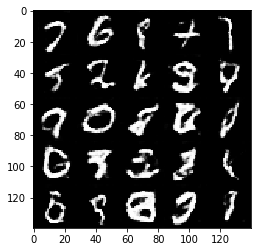

Epoch 1/2... Discriminator Loss: 0.7027... Generator Loss: 0.8407
Epoch 1/2... Discriminator Loss: 0.4158... Generator Loss: 1.6701
Epoch 1/2... Discriminator Loss: 1.0627... Generator Loss: 0.6163
Epoch 1/2... Discriminator Loss: 0.2988... Generator Loss: 1.5966
Epoch 1/2... Discriminator Loss: 0.4113... Generator Loss: 1.3676
Epoch 1/2... Discriminator Loss: 0.7185... Generator Loss: 0.8423
Epoch 1/2... Discriminator Loss: 0.5108... Generator Loss: 1.0976
Epoch 1/2... Discriminator Loss: 0.5052... Generator Loss: 1.2070
Epoch 1/2... Discriminator Loss: 0.3501... Generator Loss: 1.4409
Epoch 1/2... Discriminator Loss: 0.7860... Generator Loss: 0.9159
(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 1)


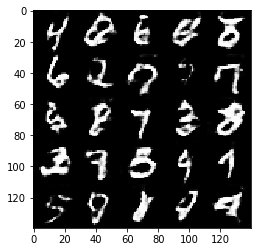

Epoch 1/2... Discriminator Loss: 1.8120... Generator Loss: 0.2295
Epoch 1/2... Discriminator Loss: 2.2247... Generator Loss: 3.9497
Epoch 1/2... Discriminator Loss: 2.0906... Generator Loss: 0.1910
Epoch 1/2... Discriminator Loss: 1.5184... Generator Loss: 0.3180
Epoch 1/2... Discriminator Loss: 1.1667... Generator Loss: 0.5621
Epoch 1/2... Discriminator Loss: 0.9637... Generator Loss: 0.6075
Epoch 1/2... Discriminator Loss: 1.1089... Generator Loss: 0.5670
Epoch 1/2... Discriminator Loss: 0.3040... Generator Loss: 2.0221
Epoch 1/2... Discriminator Loss: 1.1201... Generator Loss: 0.5134
Epoch 1/2... Discriminator Loss: 0.4065... Generator Loss: 3.3558
(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 1)


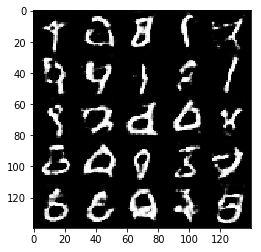

Epoch 1/2... Discriminator Loss: 0.4177... Generator Loss: 1.3467
Epoch 1/2... Discriminator Loss: 1.0988... Generator Loss: 0.5715
Epoch 1/2... Discriminator Loss: 1.0660... Generator Loss: 0.5667
Epoch 1/2... Discriminator Loss: 0.7882... Generator Loss: 0.7818
Epoch 1/2... Discriminator Loss: 1.9310... Generator Loss: 0.1954
Epoch 1/2... Discriminator Loss: 0.5866... Generator Loss: 1.1183
Epoch 1/2... Discriminator Loss: 2.4079... Generator Loss: 0.1625
Epoch 1/2... Discriminator Loss: 0.5349... Generator Loss: 1.1598
Epoch 1/2... Discriminator Loss: 0.5393... Generator Loss: 1.1678
Epoch 1/2... Discriminator Loss: 0.6566... Generator Loss: 0.9076
(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 1)


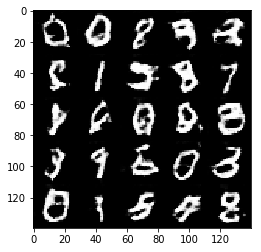

Epoch 1/2... Discriminator Loss: 0.5055... Generator Loss: 1.1104
Epoch 1/2... Discriminator Loss: 1.7834... Generator Loss: 0.2352
Epoch 1/2... Discriminator Loss: 0.4407... Generator Loss: 2.1290
Epoch 1/2... Discriminator Loss: 1.2925... Generator Loss: 0.4801
Epoch 1/2... Discriminator Loss: 0.3599... Generator Loss: 1.4079
Epoch 1/2... Discriminator Loss: 0.4238... Generator Loss: 3.3031
Epoch 1/2... Discriminator Loss: 0.8268... Generator Loss: 0.7773
Epoch 1/2... Discriminator Loss: 0.7882... Generator Loss: 0.8159
Epoch 1/2... Discriminator Loss: 1.3023... Generator Loss: 0.4237
Epoch 1/2... Discriminator Loss: 0.5847... Generator Loss: 1.2083
(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 1)


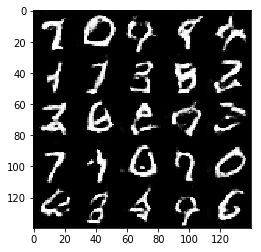

Epoch 1/2... Discriminator Loss: 0.6038... Generator Loss: 1.0816
Epoch 1/2... Discriminator Loss: 1.5774... Generator Loss: 0.2912
Epoch 1/2... Discriminator Loss: 1.0091... Generator Loss: 0.6473
Epoch 1/2... Discriminator Loss: 0.5180... Generator Loss: 1.2257
Epoch 1/2... Discriminator Loss: 0.5783... Generator Loss: 1.0389
Epoch 1/2... Discriminator Loss: 0.8201... Generator Loss: 0.7685
Epoch 1/2... Discriminator Loss: 1.1919... Generator Loss: 0.4849
Epoch 1/2... Discriminator Loss: 0.4804... Generator Loss: 1.2828
Epoch 1/2... Discriminator Loss: 0.7191... Generator Loss: 0.8691
Epoch 1/2... Discriminator Loss: 0.3946... Generator Loss: 1.8983
(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 1)


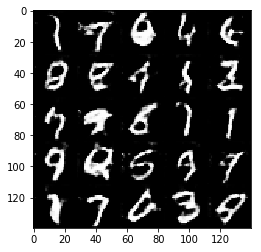

Epoch 1/2... Discriminator Loss: 0.5305... Generator Loss: 1.2275
Epoch 1/2... Discriminator Loss: 0.8755... Generator Loss: 0.6680
Epoch 1/2... Discriminator Loss: 0.7019... Generator Loss: 1.1129
Epoch 1/2... Discriminator Loss: 0.9872... Generator Loss: 0.6874
Epoch 1/2... Discriminator Loss: 1.6755... Generator Loss: 0.2900
Epoch 1/2... Discriminator Loss: 0.5885... Generator Loss: 0.9559
Epoch 1/2... Discriminator Loss: 0.7289... Generator Loss: 0.9545
Epoch 1/2... Discriminator Loss: 0.7933... Generator Loss: 0.9312
Epoch 1/2... Discriminator Loss: 1.0382... Generator Loss: 0.5584
Epoch 1/2... Discriminator Loss: 0.7239... Generator Loss: 0.9234
(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 1)


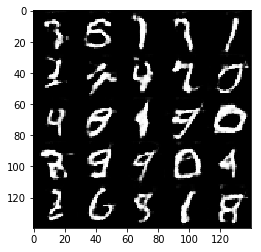

Epoch 1/2... Discriminator Loss: 0.6976... Generator Loss: 0.8495
Epoch 1/2... Discriminator Loss: 1.3331... Generator Loss: 0.5213
Epoch 1/2... Discriminator Loss: 1.2243... Generator Loss: 0.4069
Epoch 1/2... Discriminator Loss: 0.5995... Generator Loss: 1.2261
Epoch 1/2... Discriminator Loss: 0.9059... Generator Loss: 3.2431
Epoch 1/2... Discriminator Loss: 1.4346... Generator Loss: 0.4493
Epoch 1/2... Discriminator Loss: 0.6175... Generator Loss: 1.0471
Epoch 1/2... Discriminator Loss: 1.0546... Generator Loss: 0.5926
Epoch 1/2... Discriminator Loss: 0.6067... Generator Loss: 0.9992
Epoch 1/2... Discriminator Loss: 0.7759... Generator Loss: 0.7936
(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 1)


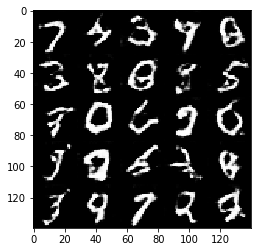

Epoch 1/2... Discriminator Loss: 0.7809... Generator Loss: 0.8859
Epoch 1/2... Discriminator Loss: 0.4212... Generator Loss: 1.4094
Epoch 1/2... Discriminator Loss: 0.6479... Generator Loss: 1.0551
Epoch 1/2... Discriminator Loss: 0.4793... Generator Loss: 1.2734
Epoch 1/2... Discriminator Loss: 1.7146... Generator Loss: 0.2539
Epoch 1/2... Discriminator Loss: 1.8081... Generator Loss: 0.2957
Epoch 1/2... Discriminator Loss: 0.5759... Generator Loss: 1.2721
Epoch 1/2... Discriminator Loss: 0.9037... Generator Loss: 0.7386
Epoch 1/2... Discriminator Loss: 0.5457... Generator Loss: 1.1378
Epoch 1/2... Discriminator Loss: 0.4897... Generator Loss: 1.2635
(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 1)


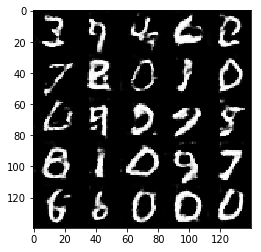

Epoch 1/2... Discriminator Loss: 0.3078... Generator Loss: 1.7564
Epoch 1/2... Discriminator Loss: 0.5976... Generator Loss: 0.9882
Epoch 1/2... Discriminator Loss: 0.6733... Generator Loss: 0.8625
Epoch 1/2... Discriminator Loss: 0.5520... Generator Loss: 1.1121
Epoch 1/2... Discriminator Loss: 0.9627... Generator Loss: 0.7832
Epoch 1/2... Discriminator Loss: 0.6153... Generator Loss: 1.1944
Epoch 1/2... Discriminator Loss: 0.6488... Generator Loss: 1.0179
Epoch 1/2... Discriminator Loss: 0.5466... Generator Loss: 1.1901
Epoch 1/2... Discriminator Loss: 0.6585... Generator Loss: 0.8391
Epoch 1/2... Discriminator Loss: 0.4822... Generator Loss: 1.1965
(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 1)


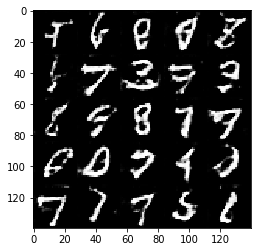

Epoch 1/2... Discriminator Loss: 0.5979... Generator Loss: 0.9761
Epoch 1/2... Discriminator Loss: 0.3441... Generator Loss: 1.5869
Epoch 1/2... Discriminator Loss: 0.8575... Generator Loss: 0.7880
Epoch 1/2... Discriminator Loss: 0.6025... Generator Loss: 1.0361
Epoch 1/2... Discriminator Loss: 0.3405... Generator Loss: 1.4663
Epoch 1/2... Discriminator Loss: 0.6403... Generator Loss: 0.9079
Epoch 1/2... Discriminator Loss: 0.7491... Generator Loss: 0.9175
Epoch 1/2... Discriminator Loss: 0.2779... Generator Loss: 2.3715
Epoch 1/2... Discriminator Loss: 0.6730... Generator Loss: 0.9970
Epoch 1/2... Discriminator Loss: 0.9558... Generator Loss: 0.5968
(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 1)


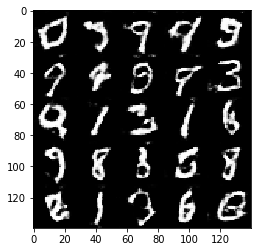

Epoch 1/2... Discriminator Loss: 0.7071... Generator Loss: 0.8554
Epoch 1/2... Discriminator Loss: 2.6783... Generator Loss: 0.1384
Epoch 1/2... Discriminator Loss: 0.4690... Generator Loss: 1.2086
Epoch 1/2... Discriminator Loss: 0.4165... Generator Loss: 1.4305
Epoch 1/2... Discriminator Loss: 0.8061... Generator Loss: 0.7612
Epoch 1/2... Discriminator Loss: 0.4285... Generator Loss: 1.3874
Epoch 1/2... Discriminator Loss: 0.6647... Generator Loss: 0.9241
Epoch 1/2... Discriminator Loss: 0.6844... Generator Loss: 0.8840
Epoch 1/2... Discriminator Loss: 0.2168... Generator Loss: 2.6473
Epoch 1/2... Discriminator Loss: 0.3937... Generator Loss: 1.4680
(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 1)


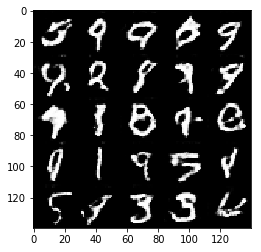

Epoch 1/2... Discriminator Loss: 0.5947... Generator Loss: 1.0106
Epoch 1/2... Discriminator Loss: 0.5060... Generator Loss: 1.1271
Epoch 1/2... Discriminator Loss: 0.6287... Generator Loss: 1.4873
Epoch 1/2... Discriminator Loss: 0.4025... Generator Loss: 1.4374
Epoch 1/2... Discriminator Loss: 1.2352... Generator Loss: 0.4856
Epoch 2/2... Discriminator Loss: 0.7433... Generator Loss: 0.8771
Epoch 2/2... Discriminator Loss: 0.7760... Generator Loss: 0.8245
Epoch 2/2... Discriminator Loss: 0.6206... Generator Loss: 1.0140
Epoch 2/2... Discriminator Loss: 0.2895... Generator Loss: 1.8254
Epoch 2/2... Discriminator Loss: 0.3932... Generator Loss: 1.5269
(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 1)


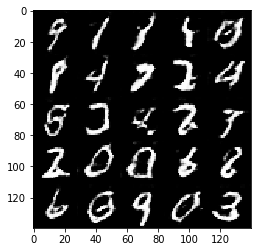

Epoch 2/2... Discriminator Loss: 0.5294... Generator Loss: 1.1656
Epoch 2/2... Discriminator Loss: 0.4805... Generator Loss: 1.2978
Epoch 2/2... Discriminator Loss: 0.4346... Generator Loss: 1.2763
Epoch 2/2... Discriminator Loss: 0.4506... Generator Loss: 1.3731
Epoch 2/2... Discriminator Loss: 0.5240... Generator Loss: 1.1095
Epoch 2/2... Discriminator Loss: 0.4890... Generator Loss: 2.9804
Epoch 2/2... Discriminator Loss: 1.4779... Generator Loss: 0.3602
Epoch 2/2... Discriminator Loss: 1.2743... Generator Loss: 0.4327
Epoch 2/2... Discriminator Loss: 0.4797... Generator Loss: 1.2889
Epoch 2/2... Discriminator Loss: 0.9488... Generator Loss: 0.7105
(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 1)


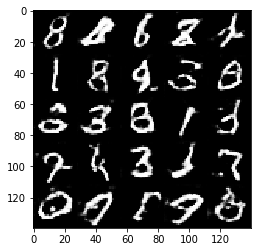

Epoch 2/2... Discriminator Loss: 0.5603... Generator Loss: 1.2902
Epoch 2/2... Discriminator Loss: 1.0815... Generator Loss: 0.5793
Epoch 2/2... Discriminator Loss: 0.7973... Generator Loss: 0.7944
Epoch 2/2... Discriminator Loss: 0.5262... Generator Loss: 1.1432
Epoch 2/2... Discriminator Loss: 2.0196... Generator Loss: 0.2240
Epoch 2/2... Discriminator Loss: 2.3835... Generator Loss: 5.3286
Epoch 2/2... Discriminator Loss: 0.5549... Generator Loss: 1.2543
Epoch 2/2... Discriminator Loss: 0.2940... Generator Loss: 2.0750
Epoch 2/2... Discriminator Loss: 0.5713... Generator Loss: 1.1764
Epoch 2/2... Discriminator Loss: 0.4741... Generator Loss: 1.1781
(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 1)


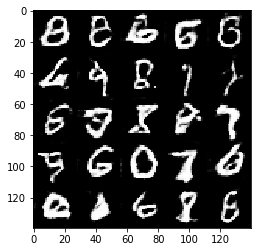

Epoch 2/2... Discriminator Loss: 1.0637... Generator Loss: 0.5420
Epoch 2/2... Discriminator Loss: 0.6059... Generator Loss: 1.3501
Epoch 2/2... Discriminator Loss: 2.2763... Generator Loss: 0.2487
Epoch 2/2... Discriminator Loss: 0.7772... Generator Loss: 0.8732
Epoch 2/2... Discriminator Loss: 0.7405... Generator Loss: 2.9880
Epoch 2/2... Discriminator Loss: 0.5309... Generator Loss: 1.1600
Epoch 2/2... Discriminator Loss: 0.5782... Generator Loss: 1.0602
Epoch 2/2... Discriminator Loss: 0.2144... Generator Loss: 2.5991
Epoch 2/2... Discriminator Loss: 0.6259... Generator Loss: 0.9967
Epoch 2/2... Discriminator Loss: 0.7599... Generator Loss: 0.9090
(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 1)


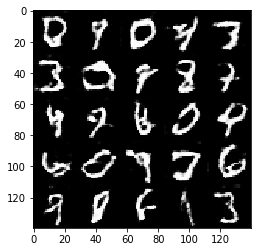

Epoch 2/2... Discriminator Loss: 0.4201... Generator Loss: 1.4008
Epoch 2/2... Discriminator Loss: 0.4292... Generator Loss: 1.3051
Epoch 2/2... Discriminator Loss: 2.0261... Generator Loss: 0.2026
Epoch 2/2... Discriminator Loss: 0.5893... Generator Loss: 1.0562
Epoch 2/2... Discriminator Loss: 0.4689... Generator Loss: 1.5812
Epoch 2/2... Discriminator Loss: 0.6563... Generator Loss: 1.1033
Epoch 2/2... Discriminator Loss: 0.5933... Generator Loss: 0.9686
Epoch 2/2... Discriminator Loss: 0.6772... Generator Loss: 1.0161
Epoch 2/2... Discriminator Loss: 0.6949... Generator Loss: 1.0590
Epoch 2/2... Discriminator Loss: 1.2156... Generator Loss: 0.5705
(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 1)


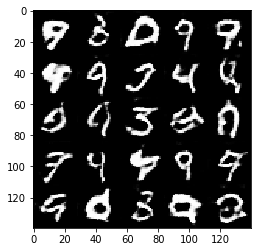

Epoch 2/2... Discriminator Loss: 0.5861... Generator Loss: 1.2007
Epoch 2/2... Discriminator Loss: 0.8347... Generator Loss: 0.6847
Epoch 2/2... Discriminator Loss: 0.4986... Generator Loss: 2.4791
Epoch 2/2... Discriminator Loss: 1.3069... Generator Loss: 0.6240
Epoch 2/2... Discriminator Loss: 1.4778... Generator Loss: 0.3554
Epoch 2/2... Discriminator Loss: 0.5778... Generator Loss: 1.2061
Epoch 2/2... Discriminator Loss: 1.4235... Generator Loss: 0.3775
Epoch 2/2... Discriminator Loss: 0.9585... Generator Loss: 0.6980
Epoch 2/2... Discriminator Loss: 0.2982... Generator Loss: 1.6837
Epoch 2/2... Discriminator Loss: 0.6799... Generator Loss: 1.0064
(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 1)


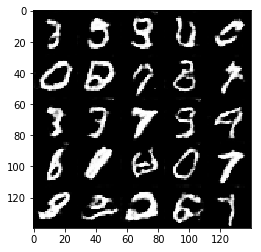

Epoch 2/2... Discriminator Loss: 0.8600... Generator Loss: 0.8350
Epoch 2/2... Discriminator Loss: 0.7046... Generator Loss: 0.8998
Epoch 2/2... Discriminator Loss: 0.4403... Generator Loss: 2.1399
Epoch 2/2... Discriminator Loss: 0.3321... Generator Loss: 2.0882
Epoch 2/2... Discriminator Loss: 0.7389... Generator Loss: 0.9912
Epoch 2/2... Discriminator Loss: 0.6461... Generator Loss: 1.1283
Epoch 2/2... Discriminator Loss: 0.5708... Generator Loss: 1.1898
Epoch 2/2... Discriminator Loss: 0.6297... Generator Loss: 1.0292
Epoch 2/2... Discriminator Loss: 1.5465... Generator Loss: 0.3708
Epoch 2/2... Discriminator Loss: 1.3324... Generator Loss: 0.5876
(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 1)


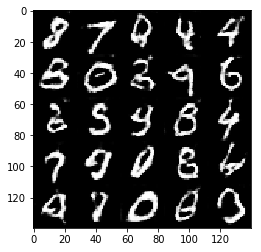

Epoch 2/2... Discriminator Loss: 1.1640... Generator Loss: 0.5889
Epoch 2/2... Discriminator Loss: 0.9764... Generator Loss: 0.6736
Epoch 2/2... Discriminator Loss: 0.5584... Generator Loss: 1.2504
Epoch 2/2... Discriminator Loss: 0.7973... Generator Loss: 0.9239
Epoch 2/2... Discriminator Loss: 0.8213... Generator Loss: 0.8904
Epoch 2/2... Discriminator Loss: 0.6640... Generator Loss: 0.8829
Epoch 2/2... Discriminator Loss: 0.2756... Generator Loss: 1.7988
Epoch 2/2... Discriminator Loss: 0.6172... Generator Loss: 1.0769
Epoch 2/2... Discriminator Loss: 0.9901... Generator Loss: 0.6689
Epoch 2/2... Discriminator Loss: 0.5142... Generator Loss: 1.1471
(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 1)


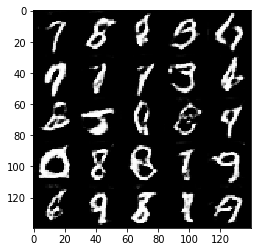

Epoch 2/2... Discriminator Loss: 0.3842... Generator Loss: 1.4887
Epoch 2/2... Discriminator Loss: 0.4265... Generator Loss: 1.2700
Epoch 2/2... Discriminator Loss: 1.0757... Generator Loss: 0.5814
Epoch 2/2... Discriminator Loss: 0.1203... Generator Loss: 3.3069
Epoch 2/2... Discriminator Loss: 0.4874... Generator Loss: 1.2188
Epoch 2/2... Discriminator Loss: 1.9682... Generator Loss: 0.2013
Epoch 2/2... Discriminator Loss: 0.1559... Generator Loss: 2.7055
Epoch 2/2... Discriminator Loss: 0.3177... Generator Loss: 2.7881
Epoch 2/2... Discriminator Loss: 0.3330... Generator Loss: 1.9000
Epoch 2/2... Discriminator Loss: 0.9527... Generator Loss: 1.2839
(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 1)


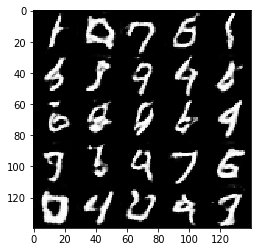

Epoch 2/2... Discriminator Loss: 0.7221... Generator Loss: 1.0318
Epoch 2/2... Discriminator Loss: 0.7543... Generator Loss: 1.0779
Epoch 2/2... Discriminator Loss: 0.6598... Generator Loss: 1.1359
Epoch 2/2... Discriminator Loss: 0.8999... Generator Loss: 0.6735
Epoch 2/2... Discriminator Loss: 0.6531... Generator Loss: 0.9706
Epoch 2/2... Discriminator Loss: 0.3739... Generator Loss: 2.0186
Epoch 2/2... Discriminator Loss: 0.6866... Generator Loss: 0.8456
Epoch 2/2... Discriminator Loss: 1.0135... Generator Loss: 0.6631
Epoch 2/2... Discriminator Loss: 0.8925... Generator Loss: 3.3106
Epoch 2/2... Discriminator Loss: 0.4583... Generator Loss: 1.8963
(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 1)


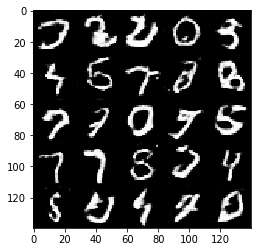

Epoch 2/2... Discriminator Loss: 1.1261... Generator Loss: 0.6033
Epoch 2/2... Discriminator Loss: 0.7216... Generator Loss: 0.9130
Epoch 2/2... Discriminator Loss: 0.4998... Generator Loss: 3.6144
Epoch 2/2... Discriminator Loss: 1.0039... Generator Loss: 0.7543
Epoch 2/2... Discriminator Loss: 0.6533... Generator Loss: 1.1255
Epoch 2/2... Discriminator Loss: 0.3532... Generator Loss: 2.0723
Epoch 2/2... Discriminator Loss: 0.3642... Generator Loss: 1.8722
Epoch 2/2... Discriminator Loss: 0.4290... Generator Loss: 1.3413
Epoch 2/2... Discriminator Loss: 0.5191... Generator Loss: 1.2114
Epoch 2/2... Discriminator Loss: 0.6847... Generator Loss: 1.0383
(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 1)


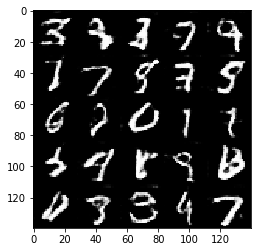

Epoch 2/2... Discriminator Loss: 0.8334... Generator Loss: 0.8117
Epoch 2/2... Discriminator Loss: 0.7978... Generator Loss: 0.8110
Epoch 2/2... Discriminator Loss: 0.3526... Generator Loss: 1.5891
Epoch 2/2... Discriminator Loss: 0.2258... Generator Loss: 1.8605
Epoch 2/2... Discriminator Loss: 0.7736... Generator Loss: 0.8073
Epoch 2/2... Discriminator Loss: 0.6378... Generator Loss: 0.9530
Epoch 2/2... Discriminator Loss: 0.7870... Generator Loss: 0.8463
Epoch 2/2... Discriminator Loss: 0.9743... Generator Loss: 0.6536
Epoch 2/2... Discriminator Loss: 1.0910... Generator Loss: 0.5732
Epoch 2/2... Discriminator Loss: 0.5551... Generator Loss: 0.9876
(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 1)


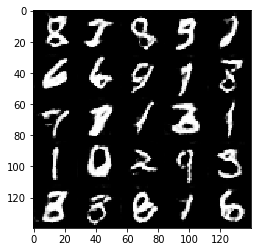

Epoch 2/2... Discriminator Loss: 0.5365... Generator Loss: 1.2096
Epoch 2/2... Discriminator Loss: 0.3809... Generator Loss: 1.3728
Epoch 2/2... Discriminator Loss: 0.3666... Generator Loss: 1.4737
Epoch 2/2... Discriminator Loss: 0.4230... Generator Loss: 1.3069
Epoch 2/2... Discriminator Loss: 0.5814... Generator Loss: 1.2327
Epoch 2/2... Discriminator Loss: 1.0731... Generator Loss: 0.6442
Epoch 2/2... Discriminator Loss: 0.8459... Generator Loss: 0.8106
Epoch 2/2... Discriminator Loss: 2.7919... Generator Loss: 0.0974
Epoch 2/2... Discriminator Loss: 0.5820... Generator Loss: 2.1237
Epoch 2/2... Discriminator Loss: 0.9623... Generator Loss: 0.6619
(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 1)


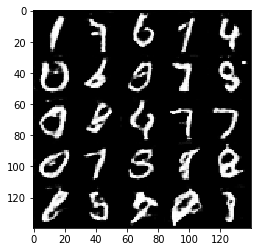

Epoch 2/2... Discriminator Loss: 0.4528... Generator Loss: 1.7736
Epoch 2/2... Discriminator Loss: 0.2688... Generator Loss: 1.9074
Epoch 2/2... Discriminator Loss: 0.9161... Generator Loss: 0.7078
Epoch 2/2... Discriminator Loss: 1.0085... Generator Loss: 0.6367
Epoch 2/2... Discriminator Loss: 0.9867... Generator Loss: 0.7604
Epoch 2/2... Discriminator Loss: 1.9092... Generator Loss: 0.4754
Epoch 2/2... Discriminator Loss: 0.7932... Generator Loss: 1.0108
Epoch 2/2... Discriminator Loss: 0.1367... Generator Loss: 2.9527
Epoch 2/2... Discriminator Loss: 1.2772... Generator Loss: 0.4143
Epoch 2/2... Discriminator Loss: 0.3785... Generator Loss: 1.4470
(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 1)


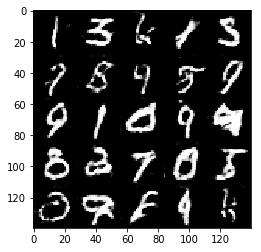

Epoch 2/2... Discriminator Loss: 1.5351... Generator Loss: 0.4466
Epoch 2/2... Discriminator Loss: 0.7894... Generator Loss: 0.7631
Epoch 2/2... Discriminator Loss: 0.6669... Generator Loss: 0.9570
Epoch 2/2... Discriminator Loss: 0.2639... Generator Loss: 2.0541
Epoch 2/2... Discriminator Loss: 0.5526... Generator Loss: 1.0200
Epoch 2/2... Discriminator Loss: 0.4107... Generator Loss: 1.4939
Epoch 2/2... Discriminator Loss: 0.1660... Generator Loss: 2.1874
Epoch 2/2... Discriminator Loss: 0.4347... Generator Loss: 1.4288
Epoch 2/2... Discriminator Loss: 0.7351... Generator Loss: 0.9802
Epoch 2/2... Discriminator Loss: 0.7209... Generator Loss: 0.9942
(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 1)


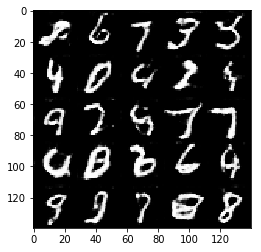

Epoch 2/2... Discriminator Loss: 0.5944... Generator Loss: 1.0783
Epoch 2/2... Discriminator Loss: 2.7922... Generator Loss: 0.0864
Epoch 2/2... Discriminator Loss: 0.3529... Generator Loss: 2.6443
Epoch 2/2... Discriminator Loss: 2.0665... Generator Loss: 0.1721
Epoch 2/2... Discriminator Loss: 0.5365... Generator Loss: 1.3111
Epoch 2/2... Discriminator Loss: 1.3976... Generator Loss: 0.4244
Epoch 2/2... Discriminator Loss: 0.5698... Generator Loss: 1.1606
Epoch 2/2... Discriminator Loss: 0.4152... Generator Loss: 1.6950
Epoch 2/2... Discriminator Loss: 0.4332... Generator Loss: 1.5538
Epoch 2/2... Discriminator Loss: 0.2711... Generator Loss: 1.9334
(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 1)


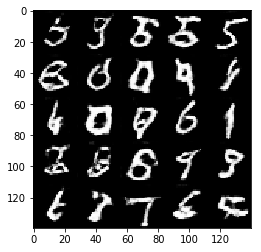

Epoch 2/2... Discriminator Loss: 2.0268... Generator Loss: 0.2697
Epoch 2/2... Discriminator Loss: 0.2674... Generator Loss: 2.4137
Epoch 2/2... Discriminator Loss: 0.5694... Generator Loss: 1.1614
Epoch 2/2... Discriminator Loss: 0.4953... Generator Loss: 1.3554
Epoch 2/2... Discriminator Loss: 0.5651... Generator Loss: 1.3854
Epoch 2/2... Discriminator Loss: 0.1967... Generator Loss: 2.1569
Epoch 2/2... Discriminator Loss: 1.0476... Generator Loss: 0.6882
Epoch 2/2... Discriminator Loss: 0.5441... Generator Loss: 1.3588
Epoch 2/2... Discriminator Loss: 0.8157... Generator Loss: 0.7374
Epoch 2/2... Discriminator Loss: 0.6837... Generator Loss: 1.0383
(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 1)


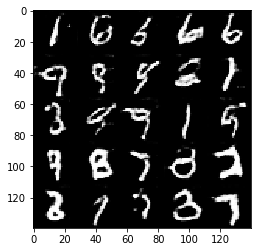

Epoch 2/2... Discriminator Loss: 1.0435... Generator Loss: 0.5874
Epoch 2/2... Discriminator Loss: 0.8642... Generator Loss: 0.6562
Epoch 2/2... Discriminator Loss: 2.6422... Generator Loss: 8.2425
Epoch 2/2... Discriminator Loss: 0.4297... Generator Loss: 1.5503
Epoch 2/2... Discriminator Loss: 0.6529... Generator Loss: 1.1329
Epoch 2/2... Discriminator Loss: 0.3237... Generator Loss: 2.1493
Epoch 2/2... Discriminator Loss: 0.2806... Generator Loss: 1.8886
Epoch 2/2... Discriminator Loss: 0.8069... Generator Loss: 0.9029
Epoch 2/2... Discriminator Loss: 0.5051... Generator Loss: 1.4495
Epoch 2/2... Discriminator Loss: 0.4469... Generator Loss: 1.3665
(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 1)


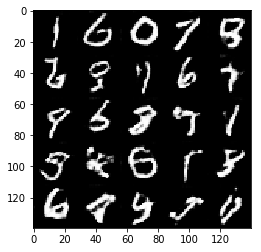

Epoch 2/2... Discriminator Loss: 0.4130... Generator Loss: 3.4837
Epoch 2/2... Discriminator Loss: 0.4479... Generator Loss: 1.2018
Epoch 2/2... Discriminator Loss: 0.6650... Generator Loss: 0.8015
Epoch 2/2... Discriminator Loss: 0.3155... Generator Loss: 1.7658
Epoch 2/2... Discriminator Loss: 0.9537... Generator Loss: 0.5720
Epoch 2/2... Discriminator Loss: 0.5406... Generator Loss: 1.3849
Epoch 2/2... Discriminator Loss: 0.5550... Generator Loss: 1.6243
Epoch 2/2... Discriminator Loss: 0.2366... Generator Loss: 2.1527
Epoch 2/2... Discriminator Loss: 0.7467... Generator Loss: 0.9244
Epoch 2/2... Discriminator Loss: 1.1505... Generator Loss: 0.5642
(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 1)


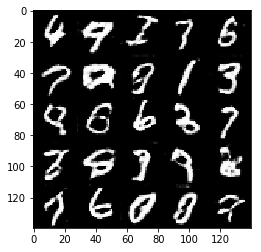

Epoch 2/2... Discriminator Loss: 0.9023... Generator Loss: 0.6918
Epoch 2/2... Discriminator Loss: 0.5869... Generator Loss: 1.0233
Epoch 2/2... Discriminator Loss: 0.4370... Generator Loss: 1.4132
Epoch 2/2... Discriminator Loss: 0.2663... Generator Loss: 1.7943
Epoch 2/2... Discriminator Loss: 0.5378... Generator Loss: 1.1972
Epoch 2/2... Discriminator Loss: 0.4575... Generator Loss: 1.2951
Epoch 2/2... Discriminator Loss: 0.3007... Generator Loss: 1.6895
Epoch 2/2... Discriminator Loss: 0.5830... Generator Loss: 1.1217
Epoch 2/2... Discriminator Loss: 0.4229... Generator Loss: 1.5397
Epoch 2/2... Discriminator Loss: 0.5100... Generator Loss: 1.3216
(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 1)


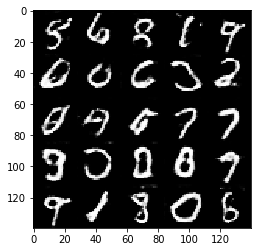

Epoch 2/2... Discriminator Loss: 0.4210... Generator Loss: 1.2781
Epoch 2/2... Discriminator Loss: 0.5599... Generator Loss: 1.0656
Epoch 2/2... Discriminator Loss: 0.9537... Generator Loss: 0.6581
Epoch 2/2... Discriminator Loss: 0.3639... Generator Loss: 1.9469
Epoch 2/2... Discriminator Loss: 0.3713... Generator Loss: 1.6488
Epoch 2/2... Discriminator Loss: 1.4469... Generator Loss: 0.4476
Epoch 2/2... Discriminator Loss: 0.3764... Generator Loss: 1.4432
Epoch 2/2... Discriminator Loss: 0.2767... Generator Loss: 1.6833
Epoch 2/2... Discriminator Loss: 0.2943... Generator Loss: 1.8019
Epoch 2/2... Discriminator Loss: 0.3401... Generator Loss: 1.7036
(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 1)


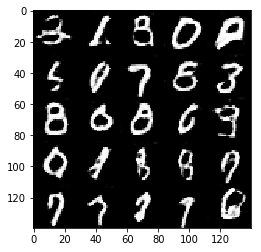

Epoch 2/2... Discriminator Loss: 0.1452... Generator Loss: 3.0384
Epoch 2/2... Discriminator Loss: 0.4842... Generator Loss: 1.4283
Epoch 2/2... Discriminator Loss: 0.5867... Generator Loss: 3.7595
Epoch 2/2... Discriminator Loss: 0.1756... Generator Loss: 2.8229
Epoch 2/2... Discriminator Loss: 0.7358... Generator Loss: 5.4753
Epoch 2/2... Discriminator Loss: 2.2619... Generator Loss: 0.1506
Epoch 2/2... Discriminator Loss: 2.1815... Generator Loss: 0.1893
Epoch 2/2... Discriminator Loss: 0.6261... Generator Loss: 0.9637
Epoch 2/2... Discriminator Loss: 0.3462... Generator Loss: 1.4322
Epoch 2/2... Discriminator Loss: 1.1845... Generator Loss: 0.5517
(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 1)


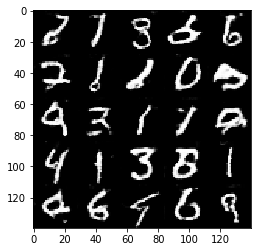

Epoch 2/2... Discriminator Loss: 0.3825... Generator Loss: 1.4187
Epoch 2/2... Discriminator Loss: 0.3736... Generator Loss: 1.5361
Epoch 2/2... Discriminator Loss: 0.6413... Generator Loss: 1.0192
Epoch 2/2... Discriminator Loss: 0.4549... Generator Loss: 1.2711
Epoch 2/2... Discriminator Loss: 0.1029... Generator Loss: 2.6611
Epoch 2/2... Discriminator Loss: 0.4759... Generator Loss: 1.2027
Epoch 2/2... Discriminator Loss: 0.2804... Generator Loss: 2.4043
Epoch 2/2... Discriminator Loss: 0.7704... Generator Loss: 0.7755
Epoch 2/2... Discriminator Loss: 0.1780... Generator Loss: 2.3160
Epoch 2/2... Discriminator Loss: 0.4080... Generator Loss: 1.5177
(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 1)


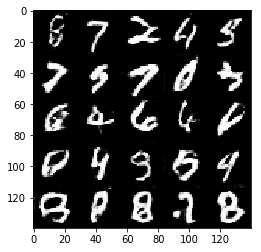

Epoch 2/2... Discriminator Loss: 0.5843... Generator Loss: 1.0861
Epoch 2/2... Discriminator Loss: 0.0516... Generator Loss: 3.5495
Epoch 2/2... Discriminator Loss: 0.5624... Generator Loss: 1.2366
Epoch 2/2... Discriminator Loss: 1.1540... Generator Loss: 0.5142
Epoch 2/2... Discriminator Loss: 1.2548... Generator Loss: 0.5762
Epoch 2/2... Discriminator Loss: 0.8149... Generator Loss: 0.7328
Epoch 2/2... Discriminator Loss: 1.2425... Generator Loss: 0.7161
Epoch 2/2... Discriminator Loss: 0.5169... Generator Loss: 3.7845
Epoch 2/2... Discriminator Loss: 1.0121... Generator Loss: 0.5861
Epoch 2/2... Discriminator Loss: 0.1889... Generator Loss: 4.0001
(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 1)


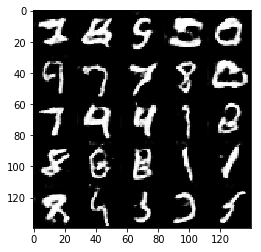

Epoch 2/2... Discriminator Loss: 0.4898... Generator Loss: 1.2614
Epoch 2/2... Discriminator Loss: 0.5561... Generator Loss: 1.0657
Epoch 2/2... Discriminator Loss: 0.3296... Generator Loss: 1.7415
Epoch 2/2... Discriminator Loss: 0.0605... Generator Loss: 3.6909
Epoch 2/2... Discriminator Loss: 0.2333... Generator Loss: 1.9782
Epoch 2/2... Discriminator Loss: 0.9042... Generator Loss: 0.9055
Epoch 2/2... Discriminator Loss: 0.6321... Generator Loss: 0.9466
Epoch 2/2... Discriminator Loss: 0.2536... Generator Loss: 2.6068
Epoch 2/2... Discriminator Loss: 0.6610... Generator Loss: 0.8805
Epoch 2/2... Discriminator Loss: 1.0104... Generator Loss: 0.6428
(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 1)


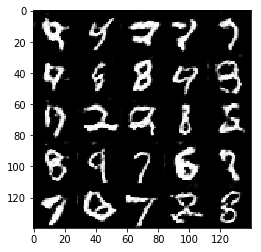

Epoch 2/2... Discriminator Loss: 0.9862... Generator Loss: 0.7543
Epoch 2/2... Discriminator Loss: 0.5050... Generator Loss: 1.4117
Epoch 2/2... Discriminator Loss: 0.3817... Generator Loss: 1.4762
Epoch 2/2... Discriminator Loss: 0.6380... Generator Loss: 1.3829
Epoch 2/2... Discriminator Loss: 0.2783... Generator Loss: 6.4528
Epoch 2/2... Discriminator Loss: 0.6587... Generator Loss: 1.2063
Epoch 2/2... Discriminator Loss: 0.6484... Generator Loss: 1.1159
Epoch 2/2... Discriminator Loss: 1.2160... Generator Loss: 5.6139
Epoch 2/2... Discriminator Loss: 0.7411... Generator Loss: 0.9174
Epoch 2/2... Discriminator Loss: 0.4729... Generator Loss: 1.3405
(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 1)


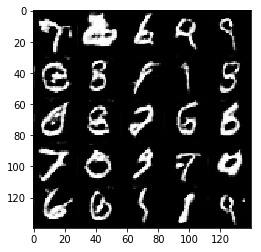

Epoch 2/2... Discriminator Loss: 0.8311... Generator Loss: 0.7967
Epoch 2/2... Discriminator Loss: 0.5558... Generator Loss: 1.0682
Epoch 2/2... Discriminator Loss: 0.9059... Generator Loss: 0.9087
Epoch 2/2... Discriminator Loss: 0.3890... Generator Loss: 1.6313
Epoch 2/2... Discriminator Loss: 0.4538... Generator Loss: 1.3932
Epoch 2/2... Discriminator Loss: 0.5124... Generator Loss: 1.1072
Epoch 2/2... Discriminator Loss: 2.1011... Generator Loss: 0.2103
Epoch 2/2... Discriminator Loss: 1.2484... Generator Loss: 0.5832
Epoch 2/2... Discriminator Loss: 0.2457... Generator Loss: 1.9945
Epoch 2/2... Discriminator Loss: 0.4250... Generator Loss: 1.2269
(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 1)


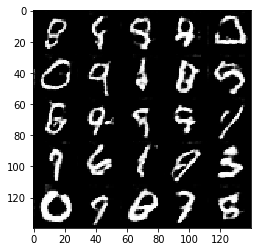

Epoch 2/2... Discriminator Loss: 1.0255... Generator Loss: 0.5701
Epoch 2/2... Discriminator Loss: 0.6114... Generator Loss: 1.0119
Epoch 2/2... Discriminator Loss: 0.6349... Generator Loss: 1.0222
Epoch 2/2... Discriminator Loss: 0.4966... Generator Loss: 1.2672
Epoch 2/2... Discriminator Loss: 0.4696... Generator Loss: 1.2239
Epoch 2/2... Discriminator Loss: 0.3356... Generator Loss: 1.7333
Epoch 2/2... Discriminator Loss: 0.6443... Generator Loss: 1.3431
Epoch 2/2... Discriminator Loss: 1.2399... Generator Loss: 6.3434
Epoch 2/2... Discriminator Loss: 0.9292... Generator Loss: 0.7692
Epoch 2/2... Discriminator Loss: 0.3035... Generator Loss: 1.7083
(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 1)


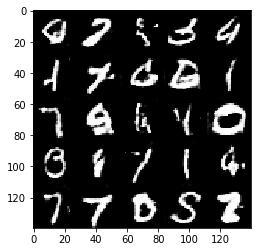

Epoch 2/2... Discriminator Loss: 0.6276... Generator Loss: 1.1825
Epoch 2/2... Discriminator Loss: 0.2711... Generator Loss: 1.7602
Epoch 2/2... Discriminator Loss: 0.2098... Generator Loss: 1.9895
Epoch 2/2... Discriminator Loss: 0.8311... Generator Loss: 0.7760
Epoch 2/2... Discriminator Loss: 0.7015... Generator Loss: 3.2726
Epoch 2/2... Discriminator Loss: 0.2696... Generator Loss: 1.9922
Epoch 2/2... Discriminator Loss: 0.7287... Generator Loss: 3.7750
Epoch 2/2... Discriminator Loss: 1.0121... Generator Loss: 0.7070
Epoch 2/2... Discriminator Loss: 0.4769... Generator Loss: 1.6503
Epoch 2/2... Discriminator Loss: 1.7776... Generator Loss: 0.3185
(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 1)


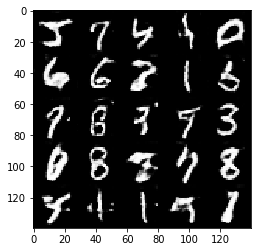

Epoch 2/2... Discriminator Loss: 0.8072... Generator Loss: 0.8734
Epoch 2/2... Discriminator Loss: 0.5614... Generator Loss: 1.1422
Epoch 2/2... Discriminator Loss: 0.2196... Generator Loss: 2.1009
Epoch 2/2... Discriminator Loss: 0.8268... Generator Loss: 0.9639
Epoch 2/2... Discriminator Loss: 0.2639... Generator Loss: 2.2160
Epoch 2/2... Discriminator Loss: 0.3296... Generator Loss: 1.7078
Epoch 2/2... Discriminator Loss: 0.5747... Generator Loss: 1.1758
Epoch 2/2... Discriminator Loss: 0.4446... Generator Loss: 2.8736
Epoch 2/2... Discriminator Loss: 0.6940... Generator Loss: 0.9009
Epoch 2/2... Discriminator Loss: 0.5388... Generator Loss: 1.3650
(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 1)


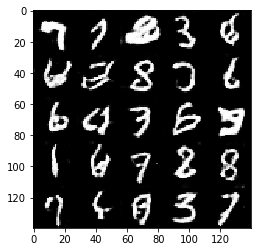

Epoch 2/2... Discriminator Loss: 1.1313... Generator Loss: 0.5264
Epoch 2/2... Discriminator Loss: 0.4630... Generator Loss: 1.4563
Epoch 2/2... Discriminator Loss: 0.5849... Generator Loss: 0.9903
Epoch 2/2... Discriminator Loss: 0.2922... Generator Loss: 1.6449
Epoch 2/2... Discriminator Loss: 0.3614... Generator Loss: 1.5284
Epoch 2/2... Discriminator Loss: 0.2654... Generator Loss: 1.8462
Epoch 2/2... Discriminator Loss: 0.8341... Generator Loss: 0.8205
Epoch 2/2... Discriminator Loss: 0.5826... Generator Loss: 1.1762
Epoch 2/2... Discriminator Loss: 0.5434... Generator Loss: 1.3036
Epoch 2/2... Discriminator Loss: 0.4292... Generator Loss: 1.5009
(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 1)


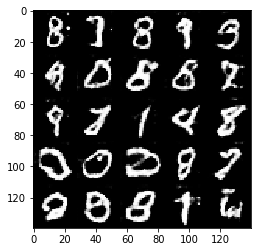

Epoch 2/2... Discriminator Loss: 0.2724... Generator Loss: 1.7236
Epoch 2/2... Discriminator Loss: 0.5701... Generator Loss: 1.1581
Epoch 2/2... Discriminator Loss: 0.4804... Generator Loss: 1.2983
Epoch 2/2... Discriminator Loss: 1.2671... Generator Loss: 0.3847
Epoch 2/2... Discriminator Loss: 0.7075... Generator Loss: 1.0757
Epoch 2/2... Discriminator Loss: 0.5655... Generator Loss: 1.0029
Epoch 2/2... Discriminator Loss: 0.9505... Generator Loss: 0.6467
Epoch 2/2... Discriminator Loss: 0.2139... Generator Loss: 1.9697
Epoch 2/2... Discriminator Loss: 0.2668... Generator Loss: 1.8794
Epoch 2/2... Discriminator Loss: 0.5809... Generator Loss: 1.4980
(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 1)


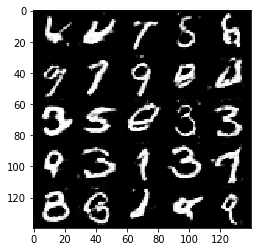

Epoch 2/2... Discriminator Loss: 0.4301... Generator Loss: 1.4669
Epoch 2/2... Discriminator Loss: 0.3291... Generator Loss: 2.0002
Epoch 2/2... Discriminator Loss: 0.2578... Generator Loss: 2.3138
Epoch 2/2... Discriminator Loss: 0.7771... Generator Loss: 1.0143
Epoch 2/2... Discriminator Loss: 0.7087... Generator Loss: 1.2645
Epoch 2/2... Discriminator Loss: 0.3249... Generator Loss: 1.7078
Epoch 2/2... Discriminator Loss: 2.4342... Generator Loss: 0.1368
Epoch 2/2... Discriminator Loss: 0.8937... Generator Loss: 5.5370
Epoch 2/2... Discriminator Loss: 0.5303... Generator Loss: 1.2465
Epoch 2/2... Discriminator Loss: 0.2875... Generator Loss: 2.1007
(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 1)


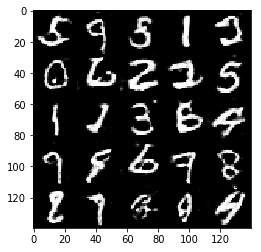

Epoch 2/2... Discriminator Loss: 0.9323... Generator Loss: 0.7569
Epoch 2/2... Discriminator Loss: 0.6790... Generator Loss: 1.1280
Epoch 2/2... Discriminator Loss: 0.2662... Generator Loss: 2.2614
Epoch 2/2... Discriminator Loss: 0.4783... Generator Loss: 1.5803
Epoch 2/2... Discriminator Loss: 0.5846... Generator Loss: 1.2447
Epoch 2/2... Discriminator Loss: 0.3503... Generator Loss: 1.4298
Epoch 2/2... Discriminator Loss: 0.5545... Generator Loss: 1.3395
Epoch 2/2... Discriminator Loss: 0.5109... Generator Loss: 1.2674
Epoch 2/2... Discriminator Loss: 0.4242... Generator Loss: 1.3815
Epoch 2/2... Discriminator Loss: 0.3986... Generator Loss: 4.7202
(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 1)


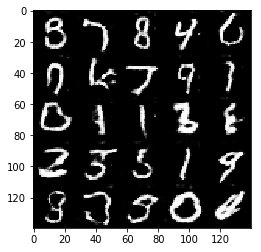

Epoch 2/2... Discriminator Loss: 0.3604... Generator Loss: 1.9112
Epoch 2/2... Discriminator Loss: 0.2678... Generator Loss: 2.2964
Epoch 2/2... Discriminator Loss: 0.3178... Generator Loss: 2.0093
Epoch 2/2... Discriminator Loss: 1.3355... Generator Loss: 0.5720
Epoch 2/2... Discriminator Loss: 0.6305... Generator Loss: 1.1611
Epoch 2/2... Discriminator Loss: 0.4025... Generator Loss: 1.2420
Epoch 2/2... Discriminator Loss: 0.6675... Generator Loss: 1.0775
Epoch 2/2... Discriminator Loss: 0.4319... Generator Loss: 1.4743
Epoch 2/2... Discriminator Loss: 0.3920... Generator Loss: 1.5431
Epoch 2/2... Discriminator Loss: 0.3531... Generator Loss: 1.6281
(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 1)


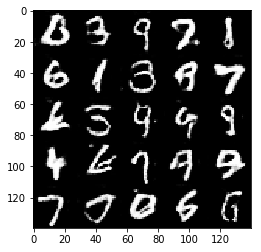

Epoch 2/2... Discriminator Loss: 0.5031... Generator Loss: 1.4102
Epoch 2/2... Discriminator Loss: 0.5609... Generator Loss: 1.1926
Epoch 2/2... Discriminator Loss: 0.3068... Generator Loss: 1.7804
Epoch 2/2... Discriminator Loss: 0.3759... Generator Loss: 1.6388
Epoch 2/2... Discriminator Loss: 0.6698... Generator Loss: 0.9237
Epoch 2/2... Discriminator Loss: 0.4346... Generator Loss: 1.3889
Epoch 2/2... Discriminator Loss: 0.0568... Generator Loss: 3.4285
Epoch 2/2... Discriminator Loss: 0.5560... Generator Loss: 1.1732
Epoch 2/2... Discriminator Loss: 0.4957... Generator Loss: 1.2743
Epoch 2/2... Discriminator Loss: 0.1101... Generator Loss: 2.7553
(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 1)


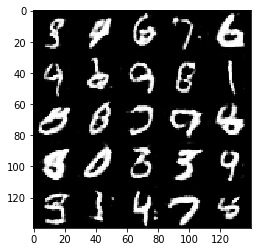

Epoch 2/2... Discriminator Loss: 0.3292... Generator Loss: 1.6044
Epoch 2/2... Discriminator Loss: 0.4047... Generator Loss: 1.4834
Epoch 2/2... Discriminator Loss: 0.4602... Generator Loss: 1.4272
Epoch 2/2... Discriminator Loss: 0.2996... Generator Loss: 1.7246
Epoch 2/2... Discriminator Loss: 0.4548... Generator Loss: 1.1970
Epoch 2/2... Discriminator Loss: 0.3366... Generator Loss: 1.6878
Epoch 2/2... Discriminator Loss: 1.3684... Generator Loss: 0.4454
Epoch 2/2... Discriminator Loss: 1.4877... Generator Loss: 9.1130
Epoch 2/2... Discriminator Loss: 0.6272... Generator Loss: 1.1399
Epoch 2/2... Discriminator Loss: 0.9444... Generator Loss: 0.7803
(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 1)


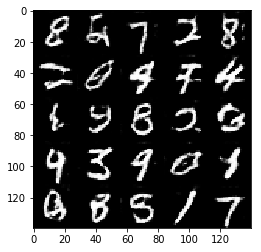

Epoch 2/2... Discriminator Loss: 0.6198... Generator Loss: 0.9851
Epoch 2/2... Discriminator Loss: 0.1101... Generator Loss: 2.9999
Epoch 2/2... Discriminator Loss: 0.6201... Generator Loss: 1.1070
Epoch 2/2... Discriminator Loss: 0.6272... Generator Loss: 0.9682
Epoch 2/2... Discriminator Loss: 0.8836... Generator Loss: 0.8672
Epoch 2/2... Discriminator Loss: 0.1675... Generator Loss: 3.2492
Epoch 2/2... Discriminator Loss: 0.5245... Generator Loss: 1.0538
Epoch 2/2... Discriminator Loss: 0.7852... Generator Loss: 0.8712
Epoch 2/2... Discriminator Loss: 0.2917... Generator Loss: 1.8631
Epoch 2/2... Discriminator Loss: 0.3651... Generator Loss: 1.6989
(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 1)


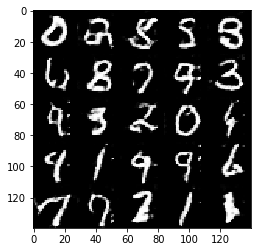

In [13]:
batch_size = 16
z_dim = 100
learning_rate = 0.0002
beta1 = 0.2


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 3)
(?, 28, 28, 3)
(?, 14, 14, 64)
(?, 7, 7, 128)
(?, 4, 4, 256)
(?, 4096)
(?, 28, 28, 3)
(?, 14, 14, 64)
(?, 7, 7, 128)
(?, 4, 4, 256)
(?, 4096)
Epoch 1/1... Discriminator Loss: 0.2529... Generator Loss: 5.4753
Epoch 1/1... Discriminator Loss: 0.6194... Generator Loss: 6.7986
Epoch 1/1... Discriminator Loss: 0.1190... Generator Loss: 4.7019
Epoch 1/1... Discriminator Loss: 0.3958... Generator Loss: 1.3903
Epoch 1/1... Discriminator Loss: 2.3185... Generator Loss: 16.9283
Epoch 1/1... Discriminator Loss: 0.9182... Generator Loss: 0.6086
Epoch 1/1... Discriminator Loss: 0.2651... Generator Loss: 4.5040
Epoch 1/1... Discriminator Loss: 2.1916... Generator Loss: 0.1685
Epoch 1/1... Discriminator Loss: 0.3177... Generator Loss: 2.2657
Epoch 1/1... Discriminator Loss: 1.1084... Generator Loss: 0.5371
(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 3)


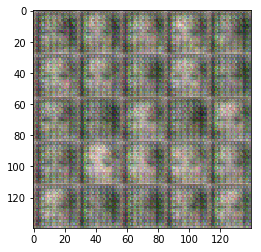

Epoch 1/1... Discriminator Loss: 1.2190... Generator Loss: 5.5202
Epoch 1/1... Discriminator Loss: 0.7630... Generator Loss: 1.0535
Epoch 1/1... Discriminator Loss: 0.4297... Generator Loss: 1.7902
Epoch 1/1... Discriminator Loss: 0.6984... Generator Loss: 1.1236
Epoch 1/1... Discriminator Loss: 0.6429... Generator Loss: 4.6612
Epoch 1/1... Discriminator Loss: 0.7034... Generator Loss: 3.6593
Epoch 1/1... Discriminator Loss: 0.5590... Generator Loss: 1.3807
Epoch 1/1... Discriminator Loss: 1.2925... Generator Loss: 0.4270
Epoch 1/1... Discriminator Loss: 0.8731... Generator Loss: 0.7394
Epoch 1/1... Discriminator Loss: 1.2124... Generator Loss: 0.4925
(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 3)


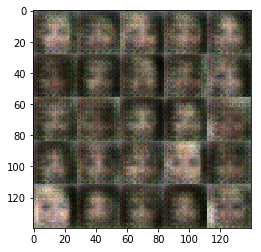

Epoch 1/1... Discriminator Loss: 0.6831... Generator Loss: 0.9471
Epoch 1/1... Discriminator Loss: 0.5748... Generator Loss: 2.9801
Epoch 1/1... Discriminator Loss: 1.0428... Generator Loss: 3.4094
Epoch 1/1... Discriminator Loss: 0.5079... Generator Loss: 1.5763
Epoch 1/1... Discriminator Loss: 2.5492... Generator Loss: 0.1527
Epoch 1/1... Discriminator Loss: 1.2916... Generator Loss: 4.3062
Epoch 1/1... Discriminator Loss: 1.5545... Generator Loss: 3.9983
Epoch 1/1... Discriminator Loss: 0.8811... Generator Loss: 1.8466
Epoch 1/1... Discriminator Loss: 0.9440... Generator Loss: 2.6993
Epoch 1/1... Discriminator Loss: 0.6958... Generator Loss: 1.5861
(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 3)


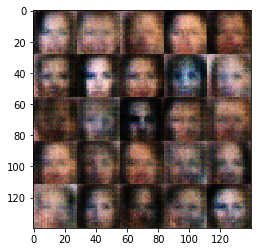

Epoch 1/1... Discriminator Loss: 0.6108... Generator Loss: 1.1962
Epoch 1/1... Discriminator Loss: 0.8393... Generator Loss: 1.9546
Epoch 1/1... Discriminator Loss: 0.7512... Generator Loss: 1.0275
Epoch 1/1... Discriminator Loss: 2.0707... Generator Loss: 0.2019
Epoch 1/1... Discriminator Loss: 0.7105... Generator Loss: 0.9661
Epoch 1/1... Discriminator Loss: 0.6245... Generator Loss: 1.1037
Epoch 1/1... Discriminator Loss: 0.6118... Generator Loss: 0.9828
Epoch 1/1... Discriminator Loss: 0.6176... Generator Loss: 2.2309
Epoch 1/1... Discriminator Loss: 1.0431... Generator Loss: 0.6781
Epoch 1/1... Discriminator Loss: 0.7061... Generator Loss: 3.6172
(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 3)


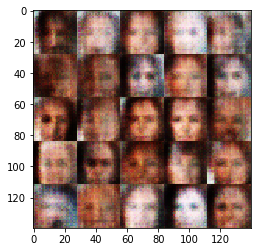

Epoch 1/1... Discriminator Loss: 0.9744... Generator Loss: 0.7789
Epoch 1/1... Discriminator Loss: 1.2032... Generator Loss: 0.4692
Epoch 1/1... Discriminator Loss: 1.2994... Generator Loss: 0.4337
Epoch 1/1... Discriminator Loss: 1.0534... Generator Loss: 0.6605
Epoch 1/1... Discriminator Loss: 1.0694... Generator Loss: 0.6330
Epoch 1/1... Discriminator Loss: 1.9085... Generator Loss: 0.2362
Epoch 1/1... Discriminator Loss: 0.8760... Generator Loss: 0.7454
Epoch 1/1... Discriminator Loss: 1.1904... Generator Loss: 0.4989
Epoch 1/1... Discriminator Loss: 1.2426... Generator Loss: 0.4310
Epoch 1/1... Discriminator Loss: 1.2867... Generator Loss: 0.4163
(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 3)


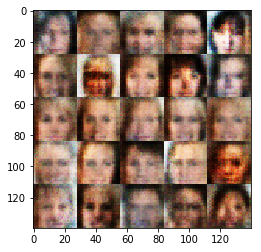

Epoch 1/1... Discriminator Loss: 0.8120... Generator Loss: 0.8071
Epoch 1/1... Discriminator Loss: 0.9104... Generator Loss: 0.7000
Epoch 1/1... Discriminator Loss: 0.8587... Generator Loss: 0.8188
Epoch 1/1... Discriminator Loss: 0.8340... Generator Loss: 0.7758
Epoch 1/1... Discriminator Loss: 1.1582... Generator Loss: 0.4641
Epoch 1/1... Discriminator Loss: 0.7737... Generator Loss: 0.9063
Epoch 1/1... Discriminator Loss: 0.7237... Generator Loss: 0.9409
Epoch 1/1... Discriminator Loss: 1.3432... Generator Loss: 0.3964
Epoch 1/1... Discriminator Loss: 0.5906... Generator Loss: 1.4004
Epoch 1/1... Discriminator Loss: 1.6599... Generator Loss: 4.4113
(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 3)


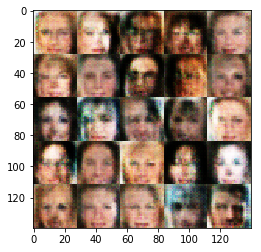

Epoch 1/1... Discriminator Loss: 0.8420... Generator Loss: 1.2740
Epoch 1/1... Discriminator Loss: 0.9071... Generator Loss: 1.1061
Epoch 1/1... Discriminator Loss: 0.9604... Generator Loss: 2.2101
Epoch 1/1... Discriminator Loss: 0.9883... Generator Loss: 2.1904
Epoch 1/1... Discriminator Loss: 0.7662... Generator Loss: 1.7854
Epoch 1/1... Discriminator Loss: 0.7189... Generator Loss: 1.1797
Epoch 1/1... Discriminator Loss: 0.7490... Generator Loss: 1.1930
Epoch 1/1... Discriminator Loss: 1.1319... Generator Loss: 0.5012
Epoch 1/1... Discriminator Loss: 1.2021... Generator Loss: 0.4586
Epoch 1/1... Discriminator Loss: 0.9734... Generator Loss: 0.6553
(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 3)


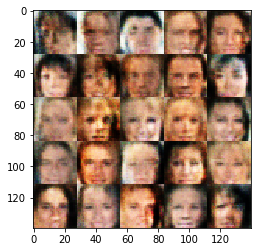

Epoch 1/1... Discriminator Loss: 0.8244... Generator Loss: 0.8568
Epoch 1/1... Discriminator Loss: 1.0733... Generator Loss: 0.5451
Epoch 1/1... Discriminator Loss: 1.1621... Generator Loss: 0.5012
Epoch 1/1... Discriminator Loss: 1.0084... Generator Loss: 0.6212
Epoch 1/1... Discriminator Loss: 1.3441... Generator Loss: 0.3855
Epoch 1/1... Discriminator Loss: 0.8913... Generator Loss: 0.7402
Epoch 1/1... Discriminator Loss: 1.1301... Generator Loss: 0.5010
Epoch 1/1... Discriminator Loss: 0.8217... Generator Loss: 2.1726
Epoch 1/1... Discriminator Loss: 0.9581... Generator Loss: 2.0426
Epoch 1/1... Discriminator Loss: 0.7903... Generator Loss: 1.9515
(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 3)


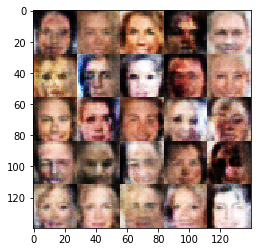

Epoch 1/1... Discriminator Loss: 0.9851... Generator Loss: 0.6342
Epoch 1/1... Discriminator Loss: 0.7895... Generator Loss: 1.8537
Epoch 1/1... Discriminator Loss: 0.7916... Generator Loss: 1.1820
Epoch 1/1... Discriminator Loss: 0.8683... Generator Loss: 1.8434
Epoch 1/1... Discriminator Loss: 0.6718... Generator Loss: 1.3295
Epoch 1/1... Discriminator Loss: 1.1838... Generator Loss: 2.0412
Epoch 1/1... Discriminator Loss: 0.9102... Generator Loss: 1.4785
Epoch 1/1... Discriminator Loss: 0.7881... Generator Loss: 1.3696
Epoch 1/1... Discriminator Loss: 0.7935... Generator Loss: 0.9095
Epoch 1/1... Discriminator Loss: 0.8456... Generator Loss: 1.8431
(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 3)


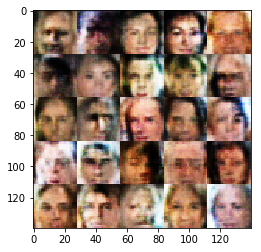

Epoch 1/1... Discriminator Loss: 1.5640... Generator Loss: 2.2214
Epoch 1/1... Discriminator Loss: 0.8318... Generator Loss: 1.0051
Epoch 1/1... Discriminator Loss: 0.8033... Generator Loss: 0.9467
Epoch 1/1... Discriminator Loss: 0.7601... Generator Loss: 1.0075
Epoch 1/1... Discriminator Loss: 0.8868... Generator Loss: 1.6525
Epoch 1/1... Discriminator Loss: 0.8535... Generator Loss: 1.3044
Epoch 1/1... Discriminator Loss: 1.4808... Generator Loss: 0.3168
Epoch 1/1... Discriminator Loss: 1.1227... Generator Loss: 0.4981
Epoch 1/1... Discriminator Loss: 0.7489... Generator Loss: 1.0979
Epoch 1/1... Discriminator Loss: 1.1057... Generator Loss: 1.9146
(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 3)


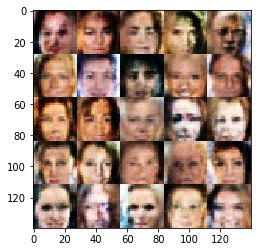

Epoch 1/1... Discriminator Loss: 0.6270... Generator Loss: 1.5867
Epoch 1/1... Discriminator Loss: 1.8586... Generator Loss: 2.6983
Epoch 1/1... Discriminator Loss: 0.8285... Generator Loss: 1.1046
Epoch 1/1... Discriminator Loss: 0.9758... Generator Loss: 0.7988
Epoch 1/1... Discriminator Loss: 0.9913... Generator Loss: 0.6676
Epoch 1/1... Discriminator Loss: 0.8666... Generator Loss: 0.7233
Epoch 1/1... Discriminator Loss: 1.0632... Generator Loss: 0.5352
Epoch 1/1... Discriminator Loss: 1.3799... Generator Loss: 0.3733
Epoch 1/1... Discriminator Loss: 0.4726... Generator Loss: 1.9618
Epoch 1/1... Discriminator Loss: 0.6363... Generator Loss: 1.3396
(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 3)


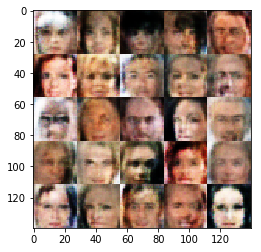

Epoch 1/1... Discriminator Loss: 0.6198... Generator Loss: 2.0559
Epoch 1/1... Discriminator Loss: 0.8909... Generator Loss: 2.2332
Epoch 1/1... Discriminator Loss: 0.6869... Generator Loss: 1.3805
Epoch 1/1... Discriminator Loss: 0.6246... Generator Loss: 1.1828
Epoch 1/1... Discriminator Loss: 2.6258... Generator Loss: 3.1898
Epoch 1/1... Discriminator Loss: 0.7802... Generator Loss: 1.5047
Epoch 1/1... Discriminator Loss: 0.9066... Generator Loss: 0.7391
Epoch 1/1... Discriminator Loss: 0.5264... Generator Loss: 1.7836
Epoch 1/1... Discriminator Loss: 1.0845... Generator Loss: 1.4027
Epoch 1/1... Discriminator Loss: 0.6582... Generator Loss: 1.5133
(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 3)


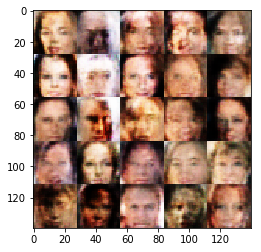

Epoch 1/1... Discriminator Loss: 0.9962... Generator Loss: 1.8068
Epoch 1/1... Discriminator Loss: 1.0907... Generator Loss: 0.4989
Epoch 1/1... Discriminator Loss: 1.0162... Generator Loss: 0.5934
Epoch 1/1... Discriminator Loss: 0.7711... Generator Loss: 0.8025
Epoch 1/1... Discriminator Loss: 0.4896... Generator Loss: 1.4877
Epoch 1/1... Discriminator Loss: 2.7070... Generator Loss: 4.2514
Epoch 1/1... Discriminator Loss: 0.8553... Generator Loss: 1.2586
Epoch 1/1... Discriminator Loss: 0.8066... Generator Loss: 0.8447
Epoch 1/1... Discriminator Loss: 1.1873... Generator Loss: 0.4675
Epoch 1/1... Discriminator Loss: 0.3894... Generator Loss: 1.8471
(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 3)


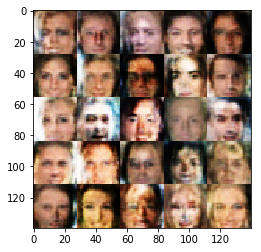

Epoch 1/1... Discriminator Loss: 1.0403... Generator Loss: 2.0685
Epoch 1/1... Discriminator Loss: 0.6891... Generator Loss: 1.2092
Epoch 1/1... Discriminator Loss: 0.6224... Generator Loss: 0.9916
Epoch 1/1... Discriminator Loss: 0.5203... Generator Loss: 1.3360
Epoch 1/1... Discriminator Loss: 0.6888... Generator Loss: 1.0043
Epoch 1/1... Discriminator Loss: 0.7647... Generator Loss: 0.8995
Epoch 1/1... Discriminator Loss: 2.8380... Generator Loss: 0.0876
Epoch 1/1... Discriminator Loss: 1.1016... Generator Loss: 0.5250
Epoch 1/1... Discriminator Loss: 0.7059... Generator Loss: 1.3739
Epoch 1/1... Discriminator Loss: 0.7255... Generator Loss: 1.4122
(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 3)


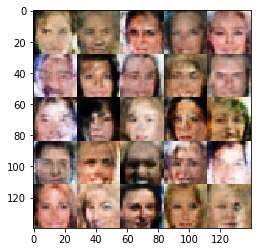

Epoch 1/1... Discriminator Loss: 0.4984... Generator Loss: 1.7964
Epoch 1/1... Discriminator Loss: 1.4549... Generator Loss: 0.3388
Epoch 1/1... Discriminator Loss: 0.9131... Generator Loss: 0.6311
Epoch 1/1... Discriminator Loss: 0.9777... Generator Loss: 0.5989
Epoch 1/1... Discriminator Loss: 0.5442... Generator Loss: 2.8673
Epoch 1/1... Discriminator Loss: 0.7728... Generator Loss: 1.2777
Epoch 1/1... Discriminator Loss: 0.9182... Generator Loss: 0.6989
Epoch 1/1... Discriminator Loss: 0.4957... Generator Loss: 1.6583
Epoch 1/1... Discriminator Loss: 3.2054... Generator Loss: 3.5696
Epoch 1/1... Discriminator Loss: 1.1642... Generator Loss: 0.5126
(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 3)


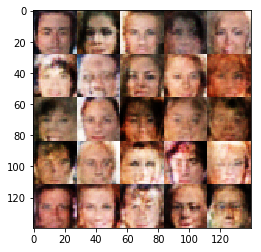

Epoch 1/1... Discriminator Loss: 0.6946... Generator Loss: 0.9443
Epoch 1/1... Discriminator Loss: 0.9066... Generator Loss: 0.6940
Epoch 1/1... Discriminator Loss: 0.5121... Generator Loss: 1.2810
Epoch 1/1... Discriminator Loss: 0.6763... Generator Loss: 1.0030
Epoch 1/1... Discriminator Loss: 1.8774... Generator Loss: 0.2013
Epoch 1/1... Discriminator Loss: 0.7886... Generator Loss: 1.0475
Epoch 1/1... Discriminator Loss: 0.6253... Generator Loss: 1.4911
Epoch 1/1... Discriminator Loss: 0.6687... Generator Loss: 1.4457
Epoch 1/1... Discriminator Loss: 0.7846... Generator Loss: 0.8522
Epoch 1/1... Discriminator Loss: 0.6060... Generator Loss: 1.0683
(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 3)


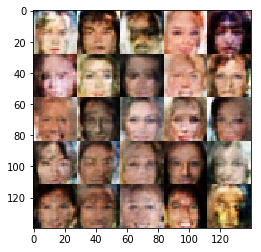

Epoch 1/1... Discriminator Loss: 0.5391... Generator Loss: 1.8334
Epoch 1/1... Discriminator Loss: 0.7971... Generator Loss: 1.4149
Epoch 1/1... Discriminator Loss: 0.8647... Generator Loss: 0.7438
Epoch 1/1... Discriminator Loss: 0.5045... Generator Loss: 1.4313
Epoch 1/1... Discriminator Loss: 0.3873... Generator Loss: 2.1708
Epoch 1/1... Discriminator Loss: 0.5432... Generator Loss: 1.5958
Epoch 1/1... Discriminator Loss: 0.5166... Generator Loss: 1.2407
Epoch 1/1... Discriminator Loss: 0.4511... Generator Loss: 2.2632
Epoch 1/1... Discriminator Loss: 1.7613... Generator Loss: 0.2375
Epoch 1/1... Discriminator Loss: 1.0137... Generator Loss: 0.7086
(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 3)


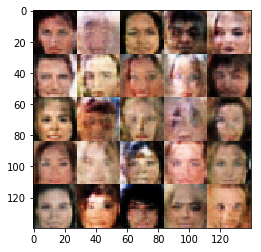

Epoch 1/1... Discriminator Loss: 0.7190... Generator Loss: 1.5539
Epoch 1/1... Discriminator Loss: 0.5739... Generator Loss: 1.3284
Epoch 1/1... Discriminator Loss: 0.7436... Generator Loss: 0.8558
Epoch 1/1... Discriminator Loss: 0.8706... Generator Loss: 2.4190
Epoch 1/1... Discriminator Loss: 2.0988... Generator Loss: 1.3395
Epoch 1/1... Discriminator Loss: 0.8053... Generator Loss: 1.1824
Epoch 1/1... Discriminator Loss: 0.5688... Generator Loss: 1.3420
Epoch 1/1... Discriminator Loss: 0.6750... Generator Loss: 1.9899
Epoch 1/1... Discriminator Loss: 1.0155... Generator Loss: 2.1115
Epoch 1/1... Discriminator Loss: 0.5817... Generator Loss: 1.1274
(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 3)


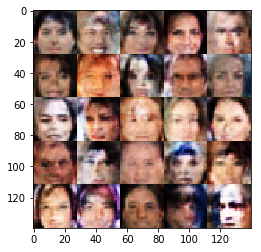

Epoch 1/1... Discriminator Loss: 0.8939... Generator Loss: 2.3709
Epoch 1/1... Discriminator Loss: 0.7706... Generator Loss: 0.8520
Epoch 1/1... Discriminator Loss: 0.7167... Generator Loss: 0.9831
Epoch 1/1... Discriminator Loss: 0.7174... Generator Loss: 0.9285
Epoch 1/1... Discriminator Loss: 0.7562... Generator Loss: 1.9483
Epoch 1/1... Discriminator Loss: 0.9110... Generator Loss: 0.6451
Epoch 1/1... Discriminator Loss: 0.5376... Generator Loss: 1.2384
Epoch 1/1... Discriminator Loss: 1.9377... Generator Loss: 3.4378
Epoch 1/1... Discriminator Loss: 0.9179... Generator Loss: 1.4937
Epoch 1/1... Discriminator Loss: 0.5188... Generator Loss: 1.3776
(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 3)


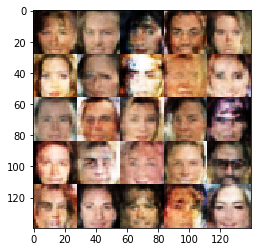

Epoch 1/1... Discriminator Loss: 0.6152... Generator Loss: 1.1527
Epoch 1/1... Discriminator Loss: 0.8926... Generator Loss: 2.1083
Epoch 1/1... Discriminator Loss: 1.4190... Generator Loss: 0.3421
Epoch 1/1... Discriminator Loss: 2.2467... Generator Loss: 0.1513
Epoch 1/1... Discriminator Loss: 0.6659... Generator Loss: 0.9749
Epoch 1/1... Discriminator Loss: 0.5227... Generator Loss: 1.4826
Epoch 1/1... Discriminator Loss: 0.5700... Generator Loss: 1.5893
Epoch 1/1... Discriminator Loss: 0.4832... Generator Loss: 1.9615
Epoch 1/1... Discriminator Loss: 1.7081... Generator Loss: 2.9434
Epoch 1/1... Discriminator Loss: 1.6437... Generator Loss: 0.2757
(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 3)


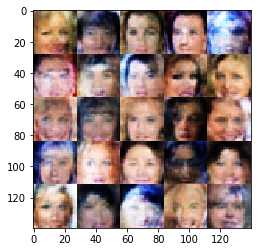

Epoch 1/1... Discriminator Loss: 1.1057... Generator Loss: 0.5184
Epoch 1/1... Discriminator Loss: 0.4794... Generator Loss: 1.4762
Epoch 1/1... Discriminator Loss: 0.5437... Generator Loss: 1.2751
Epoch 1/1... Discriminator Loss: 0.5343... Generator Loss: 1.1692
Epoch 1/1... Discriminator Loss: 0.5928... Generator Loss: 2.9251
Epoch 1/1... Discriminator Loss: 0.8377... Generator Loss: 2.1690
Epoch 1/1... Discriminator Loss: 0.5802... Generator Loss: 1.1891
Epoch 1/1... Discriminator Loss: 1.0001... Generator Loss: 0.5721
Epoch 1/1... Discriminator Loss: 0.5866... Generator Loss: 1.9908
Epoch 1/1... Discriminator Loss: 0.8225... Generator Loss: 2.2145
(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 3)


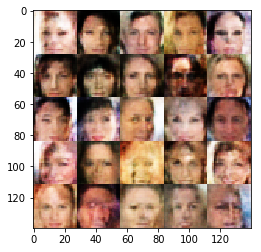

Epoch 1/1... Discriminator Loss: 0.6892... Generator Loss: 1.0013
Epoch 1/1... Discriminator Loss: 0.4910... Generator Loss: 1.8453
Epoch 1/1... Discriminator Loss: 0.7803... Generator Loss: 1.0639
Epoch 1/1... Discriminator Loss: 1.2741... Generator Loss: 2.8990
Epoch 1/1... Discriminator Loss: 0.4530... Generator Loss: 1.5468
Epoch 1/1... Discriminator Loss: 0.5554... Generator Loss: 1.4080
Epoch 1/1... Discriminator Loss: 0.8566... Generator Loss: 2.1789
Epoch 1/1... Discriminator Loss: 0.5070... Generator Loss: 1.3533
Epoch 1/1... Discriminator Loss: 0.2719... Generator Loss: 2.1482
Epoch 1/1... Discriminator Loss: 1.7639... Generator Loss: 0.2396
(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 3)


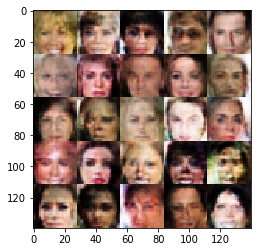

Epoch 1/1... Discriminator Loss: 2.0822... Generator Loss: 0.1888
Epoch 1/1... Discriminator Loss: 0.4768... Generator Loss: 1.4677
Epoch 1/1... Discriminator Loss: 0.6801... Generator Loss: 0.9565
Epoch 1/1... Discriminator Loss: 0.5448... Generator Loss: 1.3915
Epoch 1/1... Discriminator Loss: 0.5182... Generator Loss: 1.2287
Epoch 1/1... Discriminator Loss: 0.5083... Generator Loss: 3.5566
Epoch 1/1... Discriminator Loss: 0.1190... Generator Loss: 3.5749
Epoch 1/1... Discriminator Loss: 0.4688... Generator Loss: 1.2719
Epoch 1/1... Discriminator Loss: 0.1774... Generator Loss: 2.6816
Epoch 1/1... Discriminator Loss: 1.0422... Generator Loss: 2.3960
(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 3)


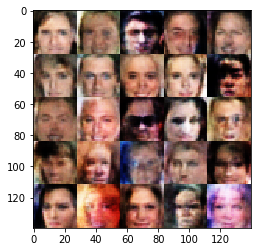

Epoch 1/1... Discriminator Loss: 2.1718... Generator Loss: 0.1582
Epoch 1/1... Discriminator Loss: 0.9015... Generator Loss: 0.7640
Epoch 1/1... Discriminator Loss: 0.5335... Generator Loss: 1.1663
Epoch 1/1... Discriminator Loss: 0.6859... Generator Loss: 0.9153
Epoch 1/1... Discriminator Loss: 0.6526... Generator Loss: 3.0598
Epoch 1/1... Discriminator Loss: 0.3523... Generator Loss: 2.9804
Epoch 1/1... Discriminator Loss: 0.2651... Generator Loss: 2.0805
Epoch 1/1... Discriminator Loss: 0.3240... Generator Loss: 1.6333
Epoch 1/1... Discriminator Loss: 0.5632... Generator Loss: 2.7336
Epoch 1/1... Discriminator Loss: 0.3325... Generator Loss: 1.6718
(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 3)


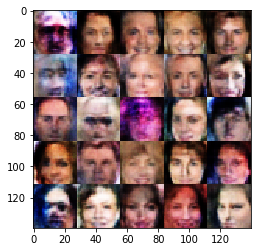

Epoch 1/1... Discriminator Loss: 0.6031... Generator Loss: 0.9713
Epoch 1/1... Discriminator Loss: 0.4081... Generator Loss: 1.7367
Epoch 1/1... Discriminator Loss: 0.3107... Generator Loss: 1.6330
Epoch 1/1... Discriminator Loss: 3.1513... Generator Loss: 0.0951
Epoch 1/1... Discriminator Loss: 0.5235... Generator Loss: 1.6114
Epoch 1/1... Discriminator Loss: 0.9444... Generator Loss: 0.7471
Epoch 1/1... Discriminator Loss: 0.5294... Generator Loss: 1.2099
Epoch 1/1... Discriminator Loss: 0.5894... Generator Loss: 1.2713
Epoch 1/1... Discriminator Loss: 0.8874... Generator Loss: 3.7683
Epoch 1/1... Discriminator Loss: 0.7648... Generator Loss: 2.2682
(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 3)


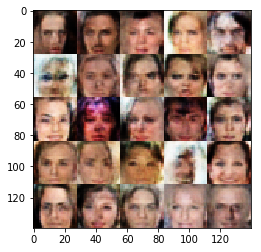

Epoch 1/1... Discriminator Loss: 0.6878... Generator Loss: 0.9513
Epoch 1/1... Discriminator Loss: 0.2825... Generator Loss: 1.9055
Epoch 1/1... Discriminator Loss: 0.1820... Generator Loss: 2.3861
Epoch 1/1... Discriminator Loss: 0.2918... Generator Loss: 1.8275
Epoch 1/1... Discriminator Loss: 0.2787... Generator Loss: 1.7689
Epoch 1/1... Discriminator Loss: 0.2279... Generator Loss: 2.5598
Epoch 1/1... Discriminator Loss: 0.7751... Generator Loss: 0.7150
Epoch 1/1... Discriminator Loss: 1.3515... Generator Loss: 0.3718
Epoch 1/1... Discriminator Loss: 1.9640... Generator Loss: 0.2292
Epoch 1/1... Discriminator Loss: 0.3793... Generator Loss: 1.8397
(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 3)


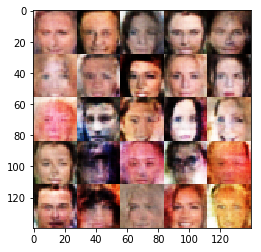

Epoch 1/1... Discriminator Loss: 0.5925... Generator Loss: 1.3835
Epoch 1/1... Discriminator Loss: 0.5164... Generator Loss: 1.1943
Epoch 1/1... Discriminator Loss: 0.3940... Generator Loss: 1.7532
Epoch 1/1... Discriminator Loss: 0.3826... Generator Loss: 1.5414
Epoch 1/1... Discriminator Loss: 0.1930... Generator Loss: 2.2813
Epoch 1/1... Discriminator Loss: 0.4190... Generator Loss: 2.8865
Epoch 1/1... Discriminator Loss: 0.3300... Generator Loss: 3.2495
Epoch 1/1... Discriminator Loss: 0.8157... Generator Loss: 4.3089
Epoch 1/1... Discriminator Loss: 2.4687... Generator Loss: 3.4446
Epoch 1/1... Discriminator Loss: 1.6862... Generator Loss: 0.2600
(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 3)


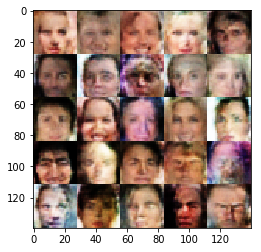

Epoch 1/1... Discriminator Loss: 0.4718... Generator Loss: 1.4631
Epoch 1/1... Discriminator Loss: 0.4184... Generator Loss: 1.4930
Epoch 1/1... Discriminator Loss: 0.5680... Generator Loss: 1.0247
Epoch 1/1... Discriminator Loss: 0.1441... Generator Loss: 2.4406
Epoch 1/1... Discriminator Loss: 0.4400... Generator Loss: 1.6336
Epoch 1/1... Discriminator Loss: 0.2190... Generator Loss: 2.9050
Epoch 1/1... Discriminator Loss: 0.2302... Generator Loss: 2.1798
Epoch 1/1... Discriminator Loss: 0.2788... Generator Loss: 2.1732
Epoch 1/1... Discriminator Loss: 1.8367... Generator Loss: 4.3668
Epoch 1/1... Discriminator Loss: 0.9894... Generator Loss: 0.6026
(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 3)


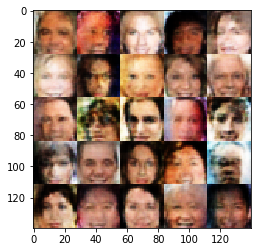

Epoch 1/1... Discriminator Loss: 0.4460... Generator Loss: 2.7095
Epoch 1/1... Discriminator Loss: 0.2248... Generator Loss: 2.0431
Epoch 1/1... Discriminator Loss: 0.8951... Generator Loss: 0.6954
Epoch 1/1... Discriminator Loss: 0.3855... Generator Loss: 1.5462
Epoch 1/1... Discriminator Loss: 0.1942... Generator Loss: 2.5585
Epoch 1/1... Discriminator Loss: 0.1935... Generator Loss: 2.1808
Epoch 1/1... Discriminator Loss: 0.3362... Generator Loss: 1.7542
Epoch 1/1... Discriminator Loss: 0.2288... Generator Loss: 2.3801
Epoch 1/1... Discriminator Loss: 0.2523... Generator Loss: 2.4115
Epoch 1/1... Discriminator Loss: 0.1293... Generator Loss: 3.0256
(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 3)


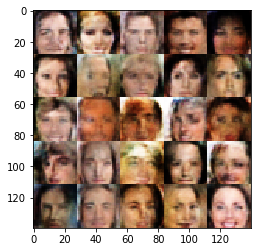

Epoch 1/1... Discriminator Loss: 0.1055... Generator Loss: 3.7572
Epoch 1/1... Discriminator Loss: 0.1077... Generator Loss: 3.2481
Epoch 1/1... Discriminator Loss: 0.2237... Generator Loss: 2.3740
Epoch 1/1... Discriminator Loss: 0.1201... Generator Loss: 2.8041
Epoch 1/1... Discriminator Loss: 0.1458... Generator Loss: 3.6508
Epoch 1/1... Discriminator Loss: 0.1781... Generator Loss: 3.9568
Epoch 1/1... Discriminator Loss: 0.2276... Generator Loss: 2.5774
Epoch 1/1... Discriminator Loss: 0.2211... Generator Loss: 2.0600
Epoch 1/1... Discriminator Loss: 2.9970... Generator Loss: 5.0039
Epoch 1/1... Discriminator Loss: 1.0832... Generator Loss: 2.5343
(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 3)


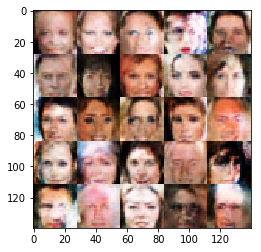

Epoch 1/1... Discriminator Loss: 0.7113... Generator Loss: 1.9707
Epoch 1/1... Discriminator Loss: 0.6919... Generator Loss: 0.8866
Epoch 1/1... Discriminator Loss: 0.5582... Generator Loss: 1.2387
Epoch 1/1... Discriminator Loss: 0.6711... Generator Loss: 0.8624
Epoch 1/1... Discriminator Loss: 0.1596... Generator Loss: 2.8115
Epoch 1/1... Discriminator Loss: 0.2072... Generator Loss: 2.3089
Epoch 1/1... Discriminator Loss: 0.4450... Generator Loss: 2.7986
Epoch 1/1... Discriminator Loss: 1.0855... Generator Loss: 2.1828
Epoch 1/1... Discriminator Loss: 0.5775... Generator Loss: 1.7281
Epoch 1/1... Discriminator Loss: 0.6690... Generator Loss: 0.9755
(?, 100)
(?, 4096)
(?, 4, 4, 256)
(?, 7, 7, 128)
(?, 14, 14, 64)
(?, 28, 28, 3)


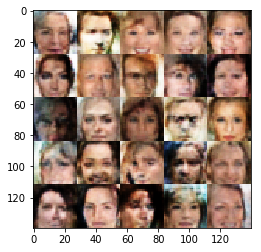

Epoch 1/1... Discriminator Loss: 0.3148... Generator Loss: 2.0674
Epoch 1/1... Discriminator Loss: 0.4178... Generator Loss: 1.4533
Epoch 1/1... Discriminator Loss: 0.2195... Generator Loss: 3.3403
Epoch 1/1... Discriminator Loss: 2.5752... Generator Loss: 4.1222
Epoch 1/1... Discriminator Loss: 0.8152... Generator Loss: 0.7424
Epoch 1/1... Discriminator Loss: 1.3441... Generator Loss: 0.3968


In [15]:
batch_size = 64
z_dim = 100
learning_rate = 0.0002
beta1 = 0.2


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.